MODELS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, SelectKBest,f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

sns.set_palette(['#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac'])
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('History2.csv')
data2 = pd.read_excel('Storage2.xlsx', sheet_name='Systems')

In [4]:
data = data.drop(['ID'], axis = 1)
data = data.drop(['DATE'], axis = 1)
data = data.drop(['SYSTEM_id'], axis = 1)
data2 = data2.drop(['ID'], axis = 1)
data2 = data2.drop(['Name'], axis = 1)
data2 = data2.drop(['Description'], axis = 1)
print(data.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   SIZE             50 non-null     int64
 1   LOAD_TPD         50 non-null     int64
 2   ACCOUNTS_ALL     50 non-null     int64
 3   ACCOUNTS_ACTIVE  50 non-null     int64
 4   Non_kept_size    50 non-null     int64
 5   Backup_size      50 non-null     int64
 6   LongOps_min      50 non-null     int64
dtypes: int64(7)
memory usage: 2.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Stage                       16 non-null     object
 1   Type                        16 non-null     object
 2   Size, Gb                    16 non-null     int64 
 3   Data Keep, years            16 non-null     int64 
 4   Backup retention

In [5]:
data['Active_All'] = data['ACCOUNTS_ACTIVE'] / data['ACCOUNTS_ALL']
print(data[['ACCOUNTS_ACTIVE', 'ACCOUNTS_ALL', 'Active_All']].head())
data['Backup_Efficiency'] = data['Backup_size'] / data['SIZE']
print(data[[ 'SIZE', 'Backup_size', 'Backup_Efficiency']].head())
data['Kept_size'] = data['SIZE'] - data['Non_kept_size']
print(data[['SIZE', 'Non_kept_size', 'Kept_size']].head())

   ACCOUNTS_ACTIVE  ACCOUNTS_ALL  Active_All
0           495005        520000    0.951933
1           515780        540000    0.955148
2           536555        560000    0.958134
3           567331        580000    0.978157
4           603106        650000    0.927855
   SIZE  Backup_size  Backup_Efficiency
0  4100         3280           0.800000
1  4180         3340           0.799043
2  4270         3410           0.798595
3  4350         3480           0.800000
4  4440         3550           0.799550
   SIZE  Non_kept_size  Kept_size
0  4100            116       3984
1  4180            121       4059
2  4270            125       4145
3  4350            130       4220
4  4440            140       4300


In [6]:
columns_to_normalize = ['LOAD_TPD', 'ACCOUNTS_ALL', 
                        'ACCOUNTS_ACTIVE', 'Active_All', 
                        'Non_kept_size', 'Kept_size', 'Backup_size', 
                        'Backup_Efficiency', 'LongOps_min']

In [7]:
data_norm_stand = data.copy()

In [8]:
scaler1 = StandardScaler()
data_norm_stand[columns_to_normalize] = scaler1.fit_transform(data_norm_stand[columns_to_normalize])

In [9]:
data_norm_stand.head()

,SIZE,LOAD_TPD,ACCOUNTS_ALL,ACCOUNTS_ACTIVE,Non_kept_size,Backup_size,LongOps_min,Active_All,Backup_Efficiency,Kept_size
0,4100,-1.183452,-1.459380,-1.411340,-0.524702,-2.117829,0.868065,-0.563014,0.898562,-1.644395
1,4180,-1.157752,-1.430443,-1.382141,-0.429232,-2.008210,0.875003,-0.458137,0.885609,-1.583615
2,4270,-1.132053,-1.401505,-1.352941,-0.352856,-1.880322,0.861127,-0.360751,0.879542,-1.513921
3,4350,-1.093504,-1.372567,-1.309685,-0.257386,-1.752434,0.881941,0.292329,0.898562,-1.453141
4,4440,-1.183452,-1.271286,-1.259402,-0.066447,-1.624546,0.868065,-1.348332,0.892465,-1.388309


In [10]:
data2_encoded = data2.copy()
data2_encoded = pd.get_dummies(data2_encoded, columns=['Stage', 'Type', 'Data Keep, years', 'Backup retention, month', 'Depreciation period, years', 'Data retention, years'])
data2_encoded.head()

,"Size, Gb",Stage_Arch,Stage_Bkp,Stage_Dev,Stage_Prod,Stage_Stage,Stage_Stby,Stage_Test,Type_Bkp,Type_DWH,Type_Mixed,Type_OLTP,"Data Keep, years_2","Data Keep, years_20","Backup retention, month_0","Backup retention, month_1","Depreciation period, years_0","Depreciation period, years_5","Depreciation period, years_7","Data retention, years_0","Data retention, years_7","Data retention, years_20"
0,8000,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False
1,8000,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False
2,8000,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False
3,8000,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,True,False,False
4,8000,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True,False,False


In [11]:
y = data['SIZE']
X = data_norm_stand.drop('SIZE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

In [12]:

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([12,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
def Evaluate(n, y_train, y_test, pred1, pred2):
    
    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(y_train, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_train, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(y_test, pred2),20))
    print('Residual Sum of Squares (RSS) on Testing set  --->',round(np.sum(np.square(y_test-pred2)),20))
    print('Mean Squared Error (MSE) on TTesting set       --->',round(mean_squared_error(y_test, pred2),20))
    print('Root Mean Squared Error (RMSE) on Testing set --->',round(np.sqrt(mean_squared_error(y_test, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(y_train- pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(y_test-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, pred2)),20)


In [13]:
def Plots(X_train, y_train, y_test, pred1, pred2):
    plt.figure(figsize=[12,9])
    for e, i in enumerate(X_train.columns):
        plt.subplot(7, 3, e+1)
        plt.scatter(y=y_train, x=X_train[i], label='Actual')
        plt.scatter(y=pred1, x=X_train[i], label='Prediction', alpha=0.5)
        plt.legend()
    plt.show()

    residuals_train = y_train - pred1
    residuals_test = y_test - pred2

    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((y_train - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(y_train,pred1)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

    plt.figure(figsize=(15, 4))
    plt.subplot(1,2,1)
    plt.scatter(pred1, residuals_train, label='Train data')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot for Training Data')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(pred2, residuals_test, label='Test data')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot for Test Data')
    plt.legend()
    plt.show()


Multiple Linear Regression(MLR)

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import shap

1.With all features

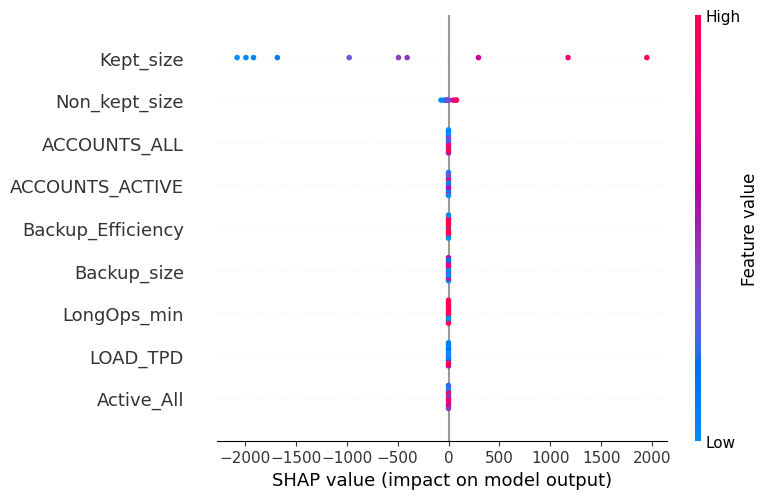

<<<------ Evaluating Multiple Linear Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [-1.96186512e-13  1.98951966e-12 -1.81898940e-12  5.23726035e+01
  3.12638804e-13 -2.13162821e-13  1.42108547e-13  9.37916411e-13
  1.23396161e+03]
The Intercept of the Regresion Model was found to be  6156.599999999999


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 1.05673735e-12

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 1.0
Residual Sum of Squares (RSS) on Testing set  ---> 0.0
Mean Squared Error (MSE) on TTesting set       ---> 0.0
Root Mean Squared Error (RMSE) on Testing set ---> 1.25365193e-12

--------------------Residual Plots--------------------


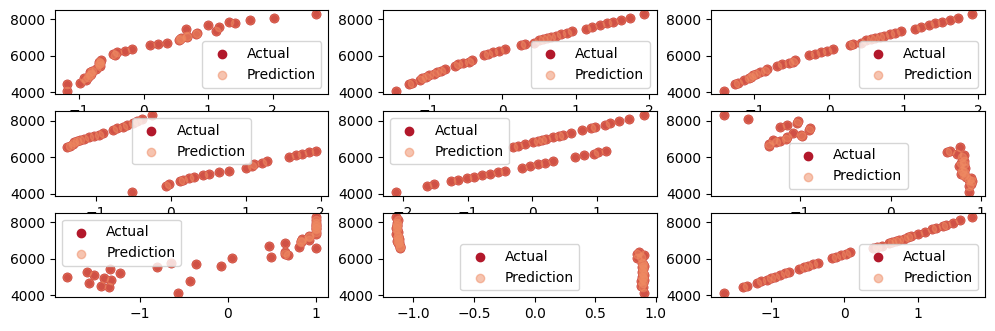

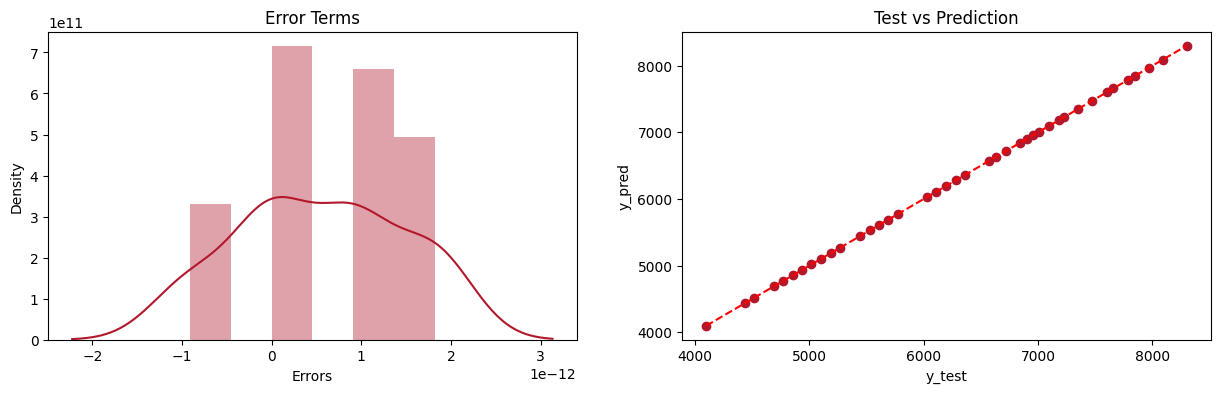

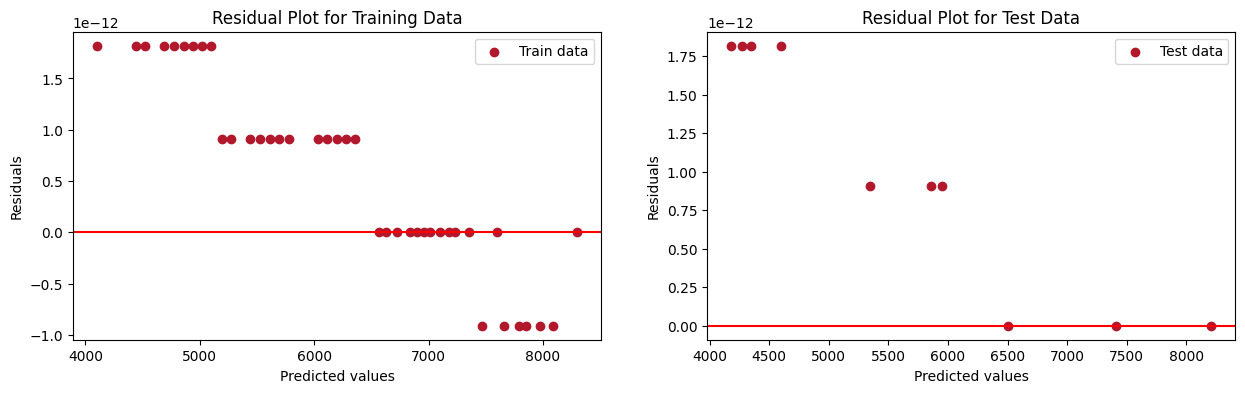

In [15]:
y = data['SIZE']
X = data_norm_stand.drop('SIZE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

MLR = LinearRegression().fit(X_train_df, y_train)
pred1 = MLR.predict(X_train_df)
pred2 = MLR.predict(X_test)
r2_MLR = round(r2_score(y_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(MLR, X_train_df)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train_df.columns)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)
Evaluate(0, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)

2.With selected features

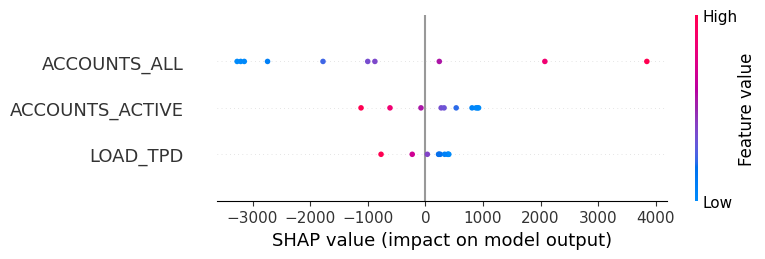

<<<------ Evaluating Multiple Linear Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [-4.23161473e-05  3.10648279e-03 -8.81960258e-04]
The Intercept of the Regresion Model was found to be  3550.9199418334188


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9933038142979459
Residual Sum of Squares (RSS) on Training set  ---> 355614.5851859522
Mean Squared Error (MSE) on Training set       ---> 8890.364629648804
Root Mean Squared Error (RMSE) on Training set ---> 94.28873013064077

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9963289552271488
Residual Sum of Squares (RSS) on Testing set  ---> 64068.39495191987
Mean Squared Error (MSE) on TTesting set       ---> 6406.839495191986
Root Mean Squared Error (RMSE) on Testing set ---> 80.04273543046855

--------------------Residual Plots--------------------


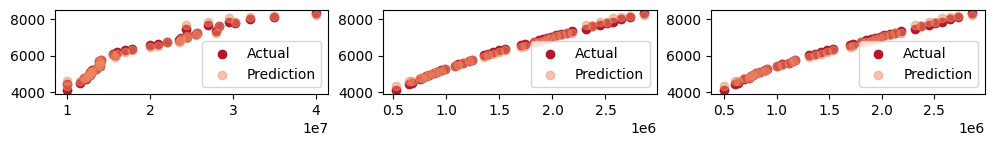

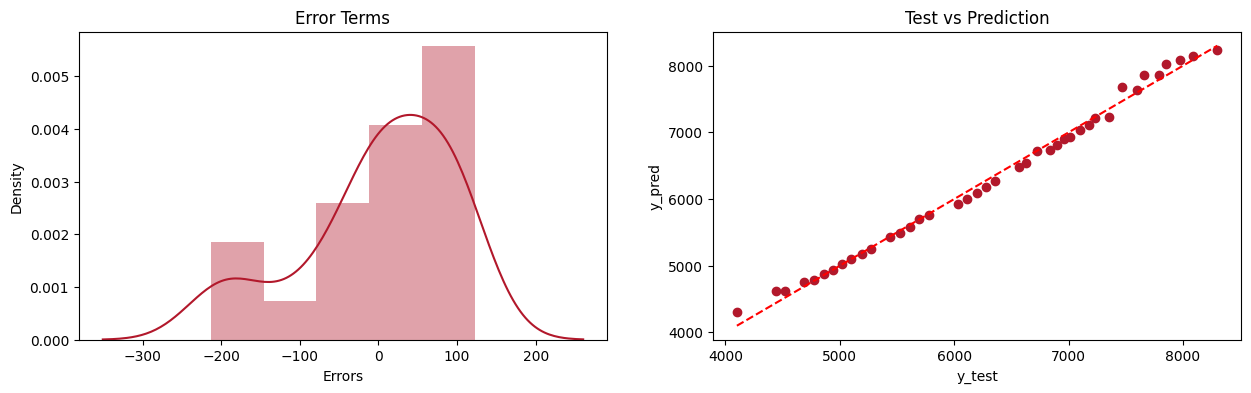

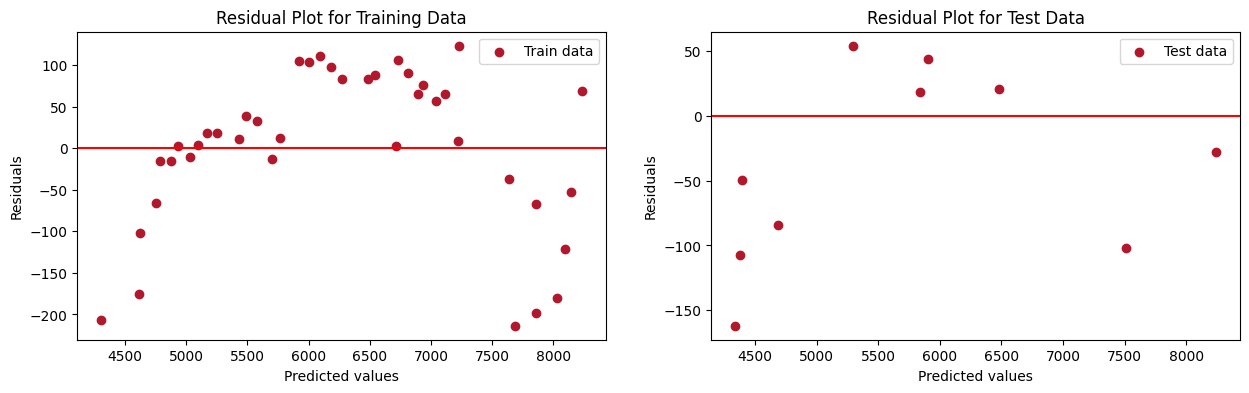

In [16]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

MLR1 = LinearRegression().fit(X1_train_df, y1_train)
pred1 = MLR1.predict(X1_train_df)
pred2 = MLR1.predict(X1_test)
r2_MLR1 = round(r2_score(y1_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(MLR1, X1_train_df)
shap_values = explainer(X1_test)
shap.summary_plot(shap_values, X1_test, feature_names=X1_train_df.columns)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR1.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR1.intercept_)
Evaluate(1, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)


3. With my categoricals

In [17]:
y_cat = data2['Size, Gb']
X_cat = data2_encoded.drop('Size, Gb', axis=1)
X_cat = X_cat.drop('Stage_Dev', axis=1)
X_cat = X_cat.drop('Stage_Stage', axis=1)
X_cat = X_cat.drop('Stage_Stby', axis=1)
X_cat = X_cat.drop('Data retention, years_0', axis=1)
X_cat = X_cat.drop('Depreciation period, years_0', axis=1)
X_cat = X_cat.drop('Backup retention, month_0', axis=1)
X_cat = X_cat.drop('Data Keep, years_20', axis=1)
X_cat = X_cat.drop('Backup retention, month_1', axis=1)
X_cat = X_cat.drop('Depreciation period, years_5', axis=1)
X_cat = X_cat.drop('Data retention, years_20', axis=1)
X_cat = X_cat.drop('Stage_Prod', axis=1)
X_cat = X_cat.drop('Data Keep, years_2', axis=1)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)
X_train_cat_df = pd.DataFrame(X_train_cat, columns=X_train_cat.columns)

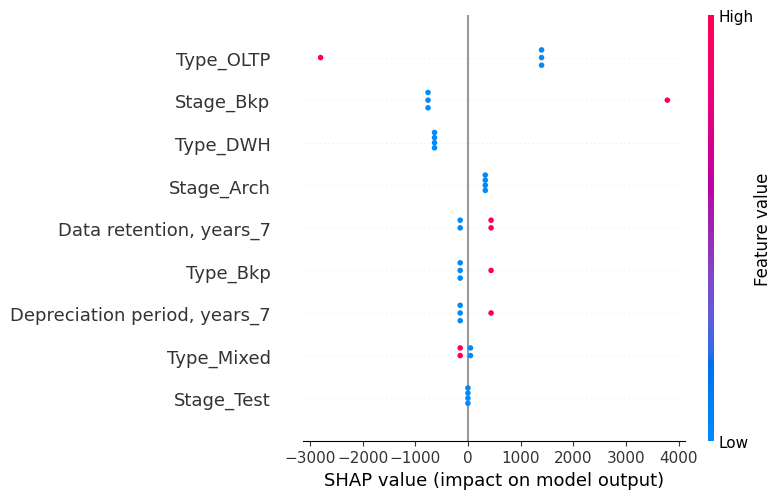

<<<------ Evaluating Multiple Linear Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [-3.95652174e+03  4.54347826e+03 -2.42152964e-11  5.86956522e+02
  3.80434783e+03 -1.95652174e+02 -4.19565217e+03  5.86956522e+02
  5.86956522e+02]
The Intercept of the Regresion Model was found to be  8195.652173913053


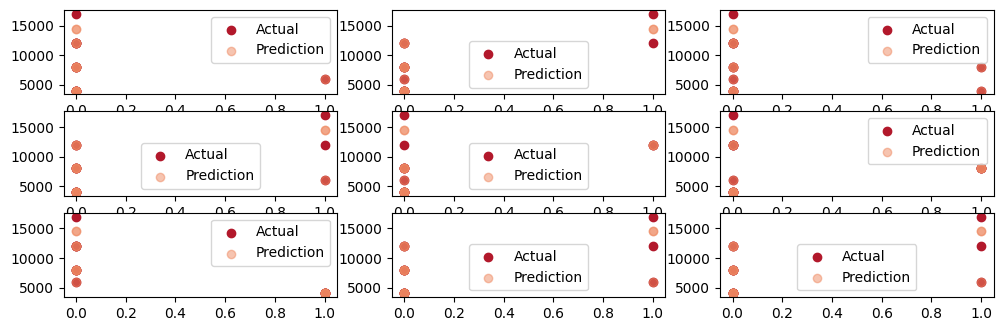

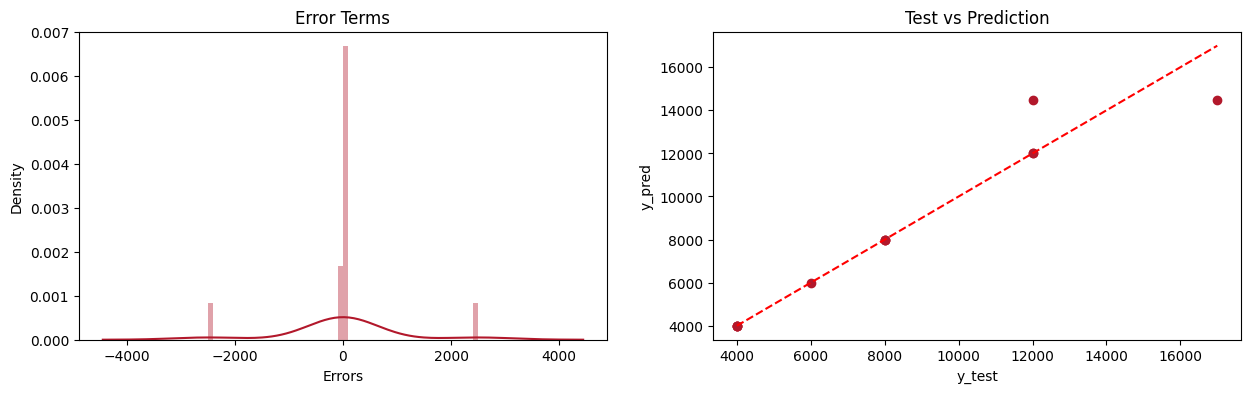

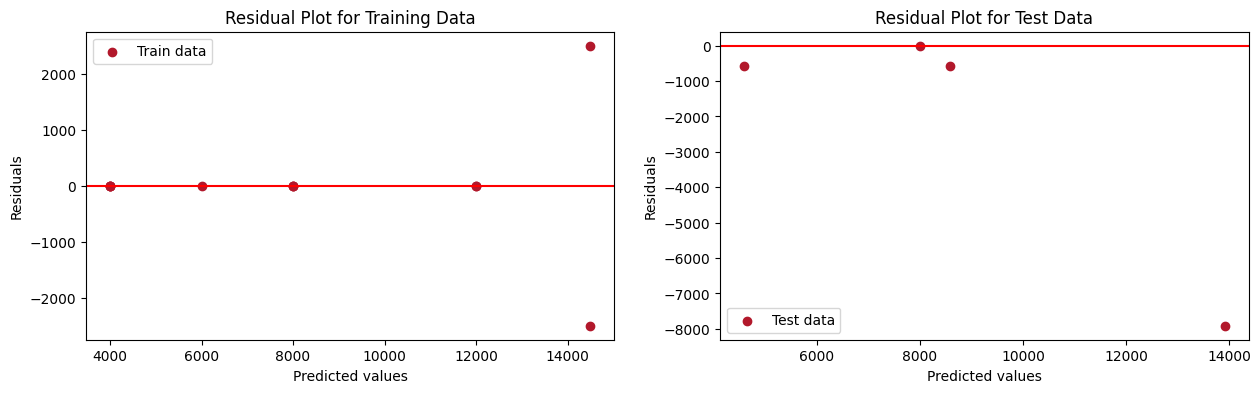

In [18]:
MLRc = LinearRegression().fit(X_train_cat_df, y_train_cat)
pred1 = MLRc.predict(X_train_cat_df)
pred2 = MLRc.predict(X_test_cat)

explainer = shap.Explainer(MLRc, X_train_cat_df)
# Calculate Shapley values
shap_values = explainer(X_test_cat)
# Visualize Shapley values
shap.summary_plot(shap_values, X_test_cat,feature_names=X_train_cat_df.columns)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLRc.coef_)
print('The Intercept of the Regresion Model was found to be ',MLRc.intercept_)
#Evaluate(2, y_train_cat, y_test_cat, pred1, pred2)
Plots(X_train_cat_df, y_train_cat, y_test_cat, pred1, pred2)

Ridge Regression Model

1. With all features

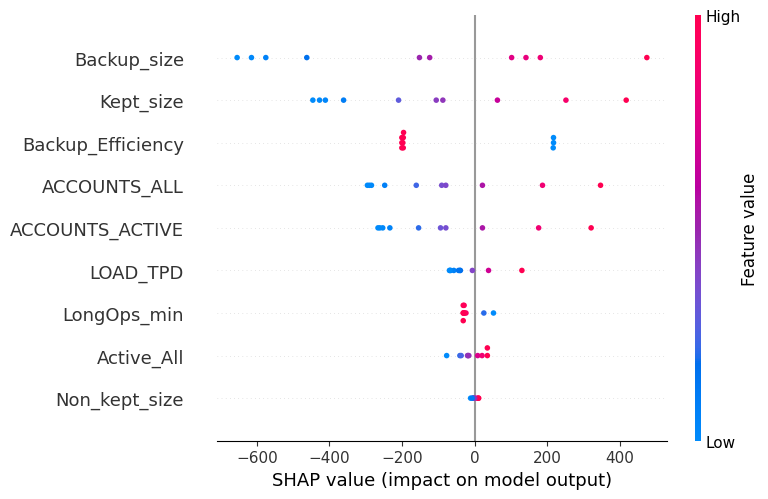

<<<------ Evaluating Ridge Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [  55.91659891  193.91680304  180.60584716    7.71352235  309.0310259
  -31.97626951   37.37057967 -206.49747271  264.75560693]
The Intercept of the Regresion Model was found to be  6160.448889353972


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9991896005169488
Residual Sum of Squares (RSS) on Training set  ---> 43037.915736380884
Mean Squared Error (MSE) on Training set       ---> 1075.947893409522
Root Mean Squared Error (RMSE) on Training set ---> 32.80164467537447

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9969405291302733
Residual Sum of Squares (RSS) on Testing set  ---> 53394.98702798172
Mean Squared Error (MSE) on TTesting set       ---> 5339.4987027981715
Root Mean Squared Error (RMSE) on Testing set ---> 73.07187354104295

--------------------Residual Plots-----------

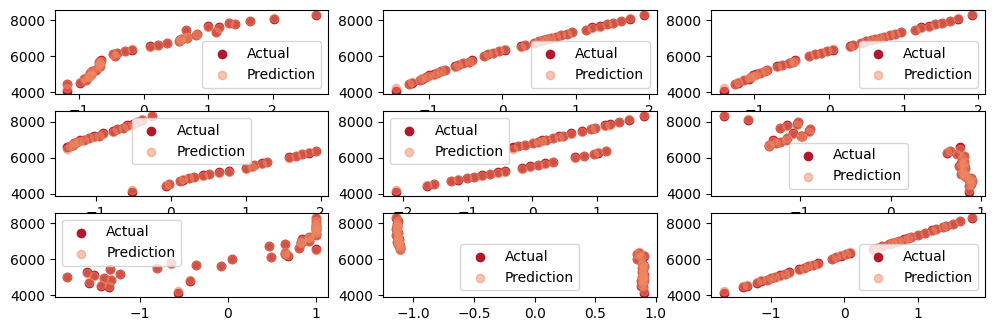

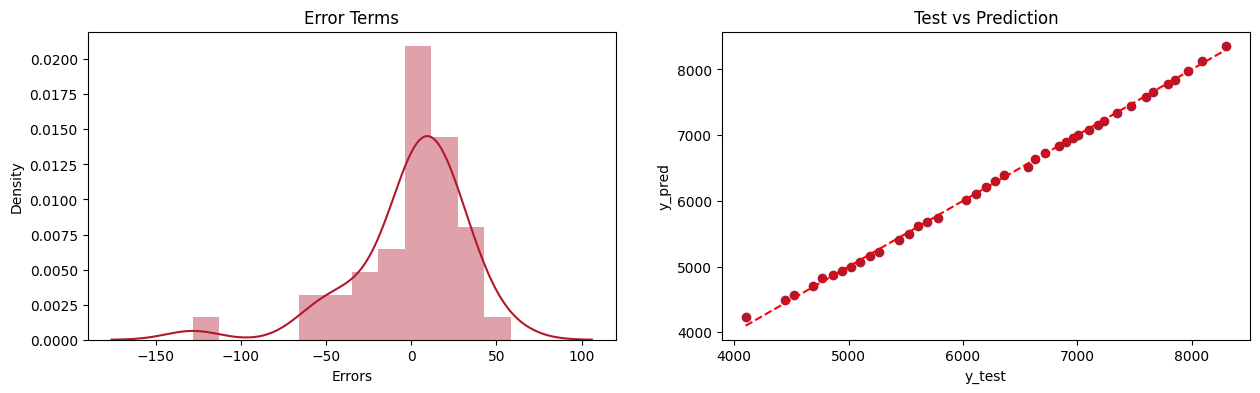

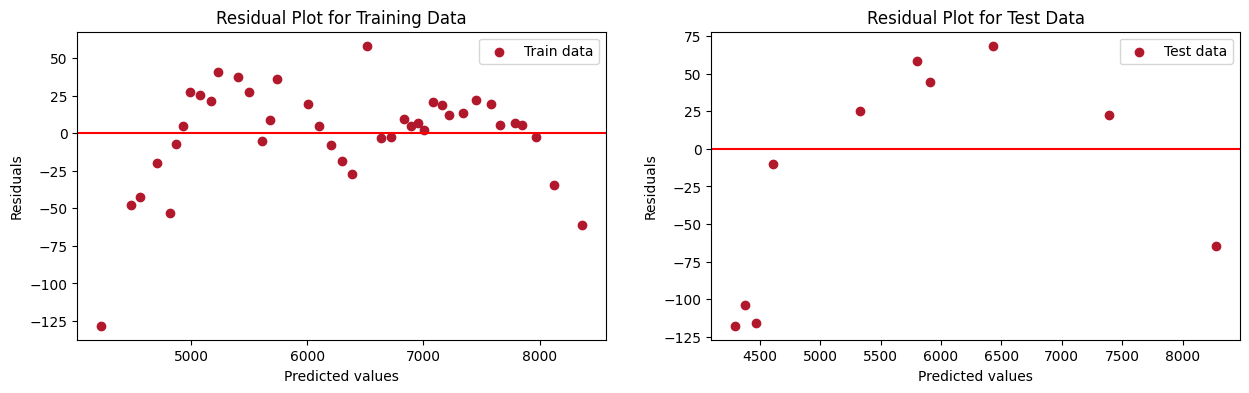

In [19]:
RLR = Ridge().fit(X_train_df,y_train)
pred1 = RLR.predict(X_train_df)
pred2 = RLR.predict(X_test)
r2_RLR = round(r2_score(y_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(RLR, X_train_df)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train_df.columns)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',RLR.coef_)
print('The Intercept of the Regresion Model was found to be ',RLR.intercept_)

Evaluate(2, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)


2. With selected features

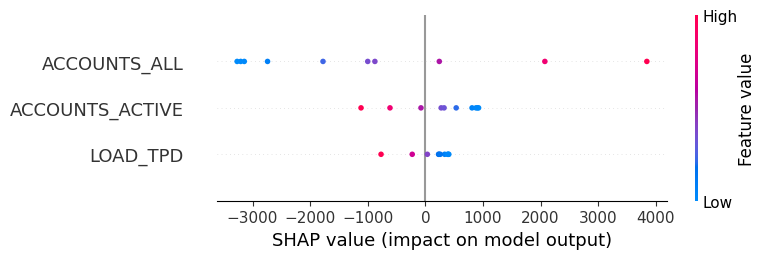

<<<------ Evaluating Ridge Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [-4.23161473e-05  3.10648278e-03 -8.81960258e-04]
The Intercept of the Regresion Model was found to be  3550.9199418697444


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9933038142979459
Residual Sum of Squares (RSS) on Training set  ---> 355614.5851859523
Mean Squared Error (MSE) on Training set       ---> 8890.364629648808
Root Mean Squared Error (RMSE) on Training set ---> 94.28873013064079

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9963289552262728
Residual Sum of Squares (RSS) on Testing set  ---> 64068.394967205044
Mean Squared Error (MSE) on TTesting set       ---> 6406.839496720504
Root Mean Squared Error (RMSE) on Testing set ---> 80.04273544001668

--------------------Residual Plots--------------------


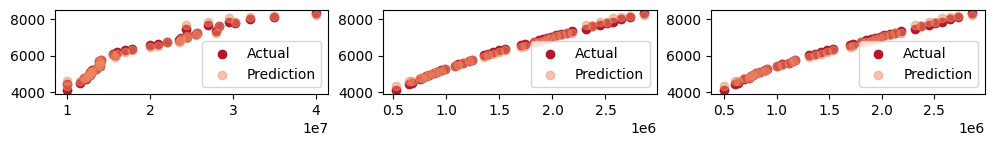

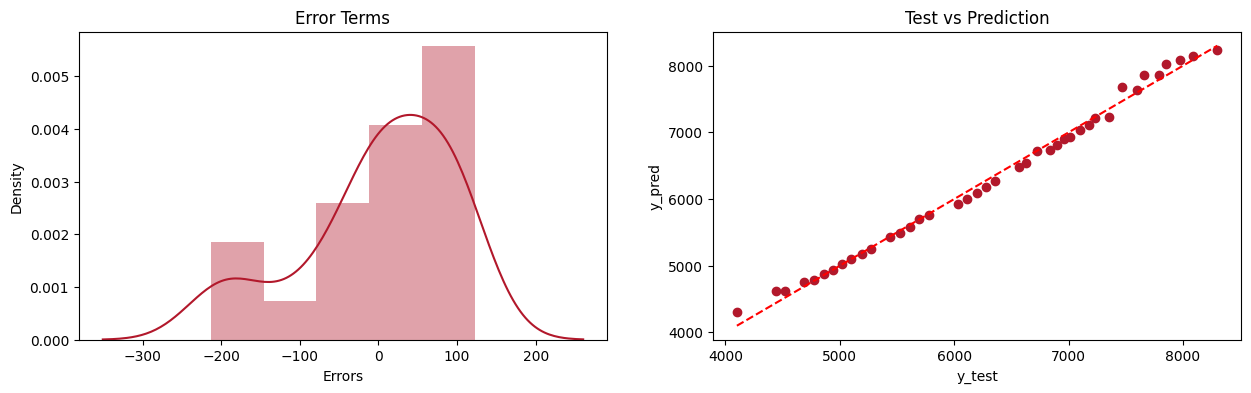

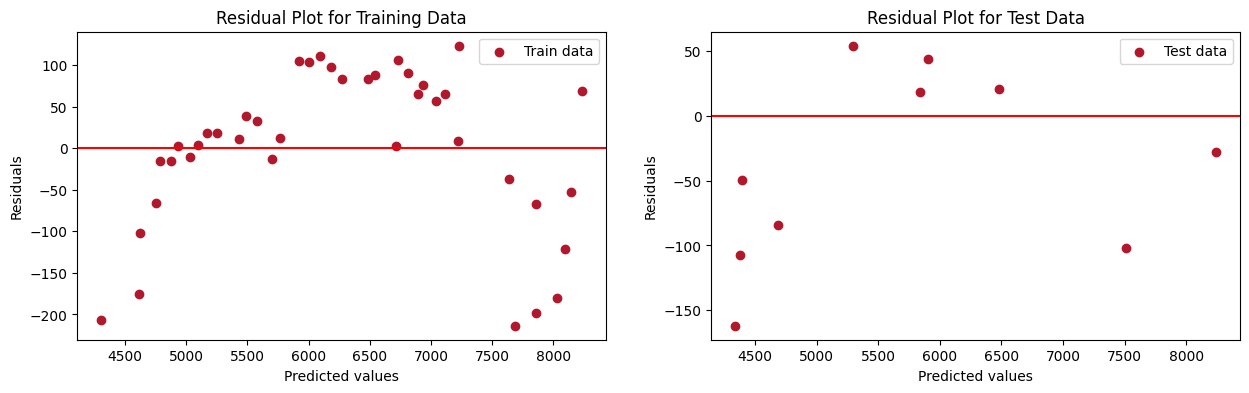

In [20]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

RLR1 = Ridge().fit(X1_train_df, y1_train)
pred1 = RLR1.predict(X1_train_df)
pred2 = RLR1.predict(X1_test)
r2_RLR1 = round(r2_score(y1_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(RLR1, X1_train_df)
shap_values = explainer(X1_test)
shap.summary_plot(shap_values, X1_test, feature_names=X1_train_df.columns)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',RLR1.coef_)
print('The Intercept of the Regresion Model was found to be ',RLR1.intercept_)
Evaluate(3, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)

Lasso Regression Model

1. With all features

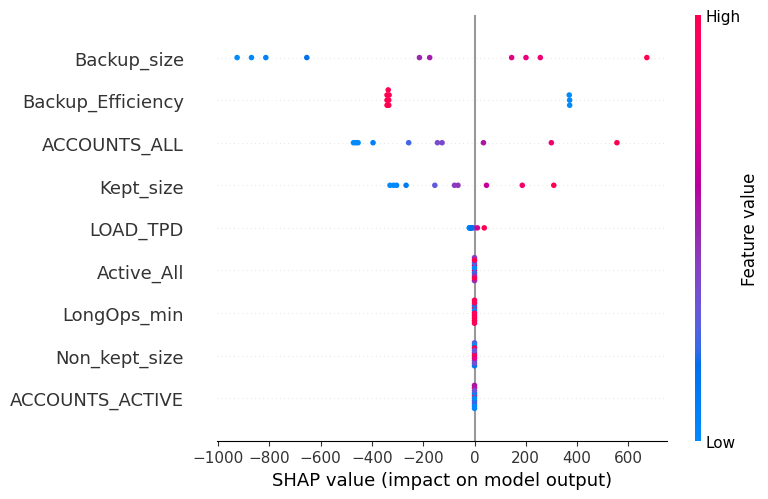

<<<------ Evaluating Lasso Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [  16.26775329  310.18092436    0.           -0.          437.42803396
   -0.           -0.         -351.91779996  195.85664179]
The Intercept of the Regresion Model was found to be  6156.977124199316


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999443561753621
Residual Sum of Squares (RSS) on Training set  ---> 2955.078681685921
Mean Squared Error (MSE) on Training set       ---> 73.87696704214802
Root Mean Squared Error (RMSE) on Training set ---> 8.595171146763048

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9999476255532157
Residual Sum of Squares (RSS) on Testing set  ---> 914.0577000812275
Mean Squared Error (MSE) on TTesting set       ---> 91.40577000812276
Root Mean Squared Error (RMSE) on Testing set ---> 9.56063648551302

--------------------Residual Plots-------------

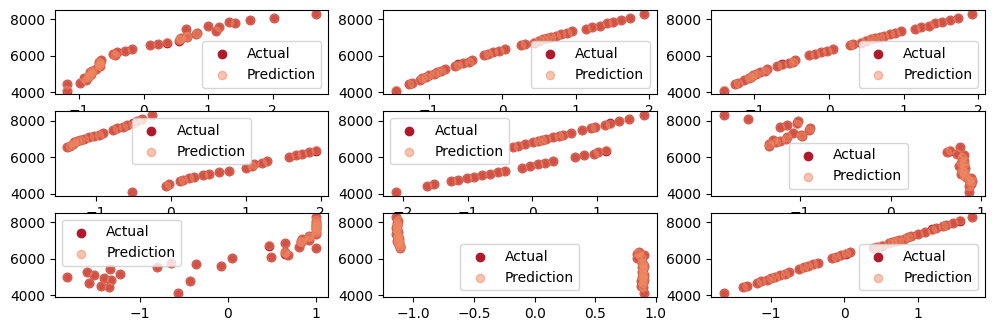

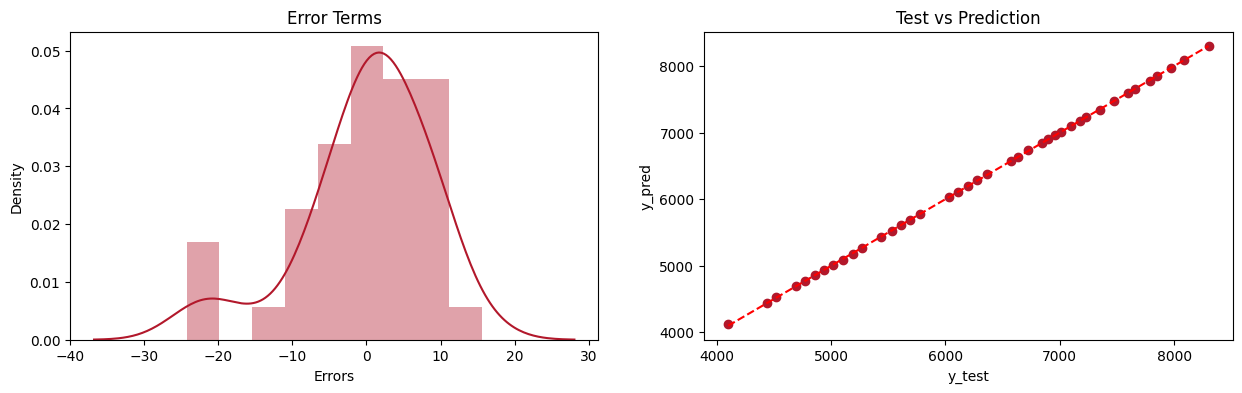

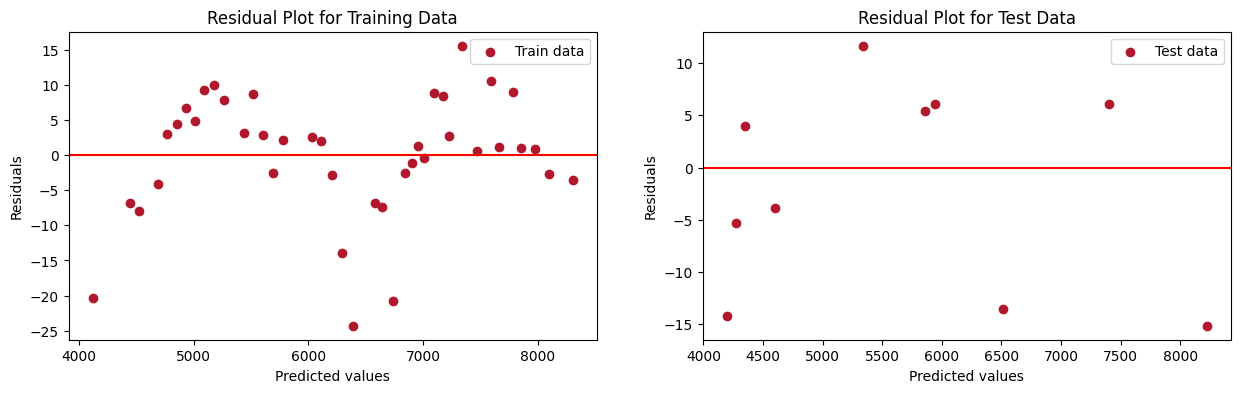

In [21]:
LLR = Lasso().fit(X_train_df, y_train)
pred1 = LLR.predict(X_train_df)
pred2 = LLR.predict(X_test)
r2_LLR = round(r2_score(y_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(LLR, X_train_df)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train_df.columns)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Regresion Model was found to be ',LLR.intercept_)
Evaluate(4, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)

2.With Selected Features

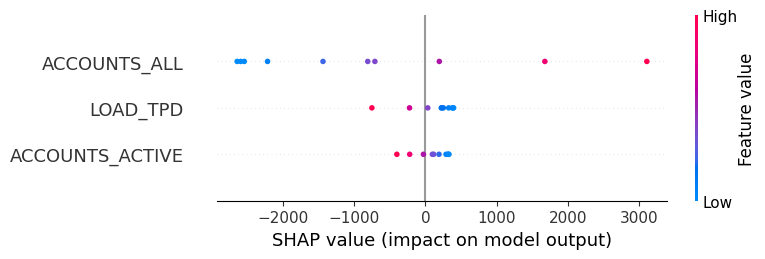

<<<------ Evaluating Lasso Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [-4.12382978e-05  2.50881136e-03 -3.15545364e-04]
The Intercept of the Regresion Model was found to be  3595.364859508025


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.993249371090621
Residual Sum of Squares (RSS) on Training set  ---> 358505.90263898135
Mean Squared Error (MSE) on Training set       ---> 8962.647565974534
Root Mean Squared Error (RMSE) on Training set ---> 94.67126050694864

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9950713111423869
Residual Sum of Squares (RSS) on Testing set  ---> 86017.25227105335
Mean Squared Error (MSE) on TTesting set       ---> 8601.725227105335
Root Mean Squared Error (RMSE) on Testing set ---> 92.74548628965906

--------------------Residual Plots--------------------


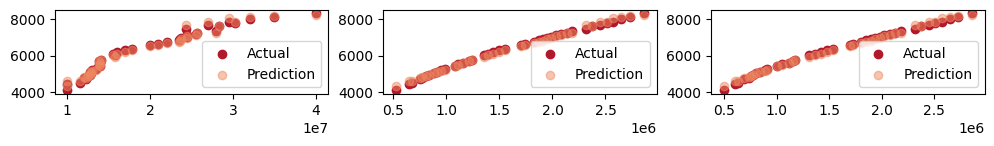

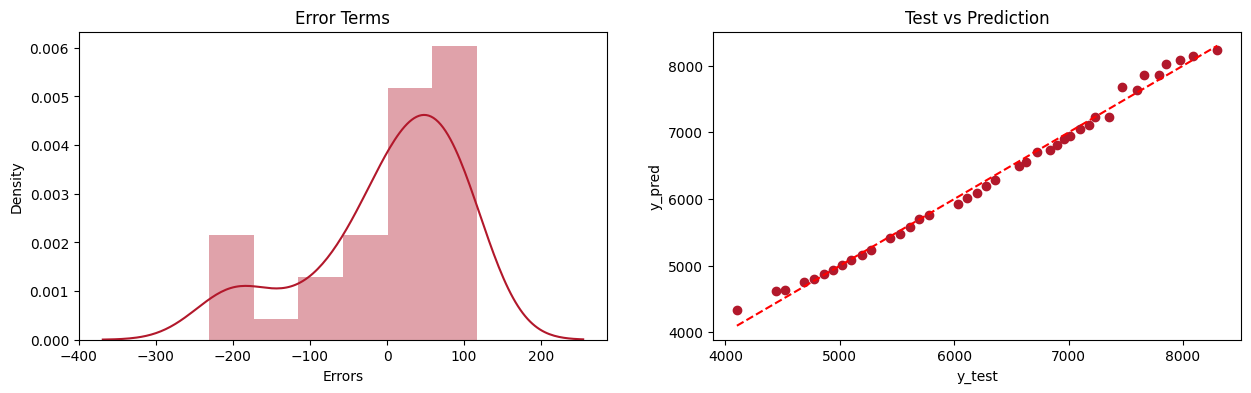

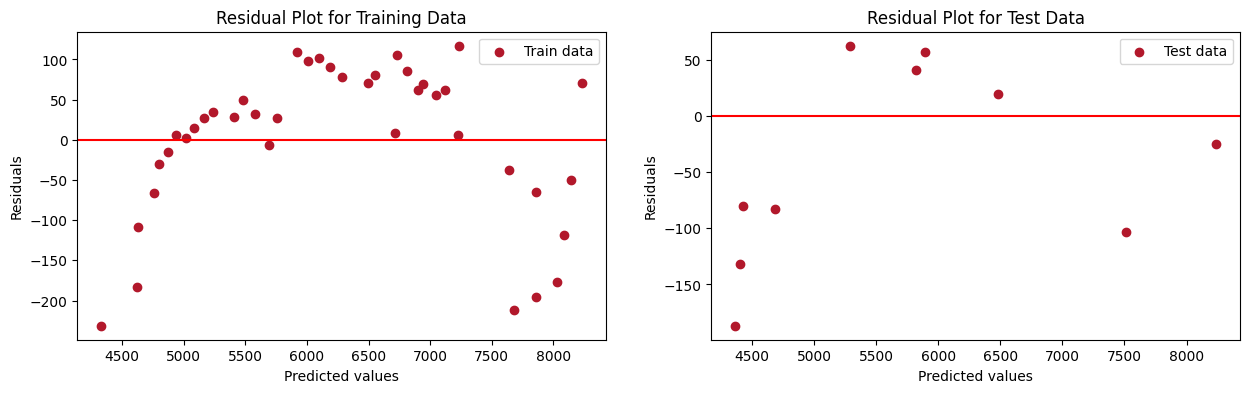

In [22]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

LLR1 = Lasso().fit(X1_train_df, y1_train)
pred1 = LLR1.predict(X1_train_df)
pred2 = LLR1.predict(X1_test)
r2_LLR1 = round(r2_score(y1_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(LLR1, X1_train_df)
shap_values = explainer(X1_test)
shap.summary_plot(shap_values, X1_test, feature_names=X1_train_df.columns)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',LLR1.coef_)
print('The Intercept of the Regresion Model was found to be ',LLR1.intercept_)
Evaluate(5, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)

Elastic-Net Regression

1. With all features

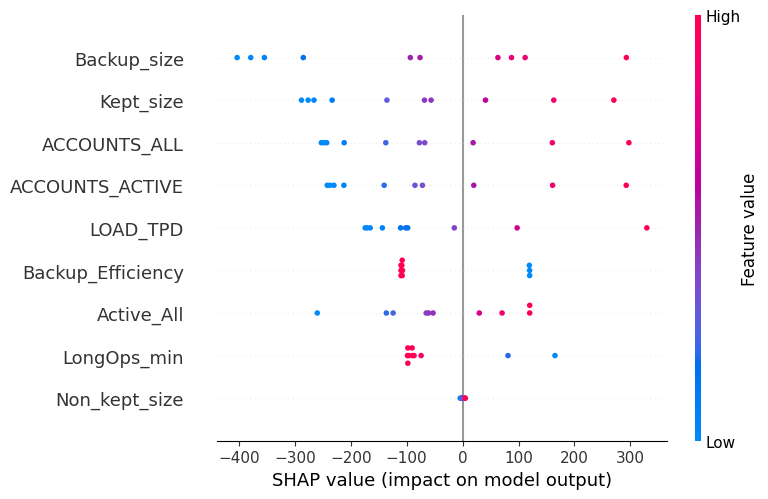

<<<------ Evaluating Elastic-Net Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [ 140.98283725  165.94813401  164.31869308    3.14993959  190.43492786
 -100.82907709  126.50714272 -113.60523081  171.1956407 ]
The Intercept of the Regresion Model was found to be  6174.888899429039


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9877708263350069
Residual Sum of Squares (RSS) on Training set  ---> 649455.1844208009
Mean Squared Error (MSE) on Training set       ---> 16236.379610520022
Root Mean Squared Error (RMSE) on Training set ---> 127.42205307763653

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9572185577828348
Residual Sum of Squares (RSS) on Testing set  ---> 746637.1308931656
Mean Squared Error (MSE) on TTesting set       ---> 74663.71308931656
Root Mean Squared Error (RMSE) on Testing set ---> 273.24661587898316

--------------------Residual Plots---

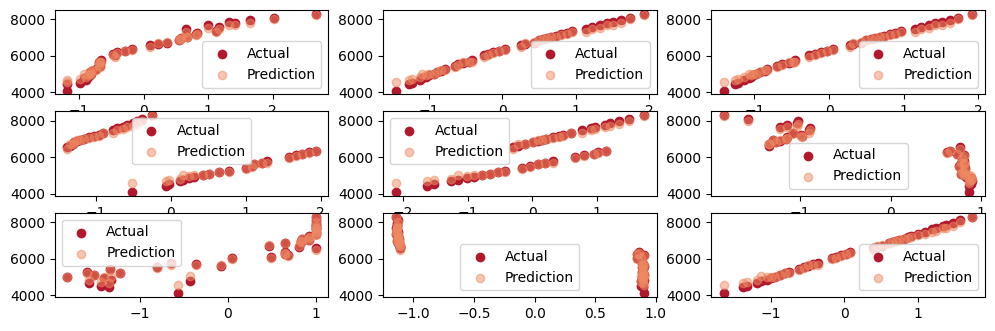

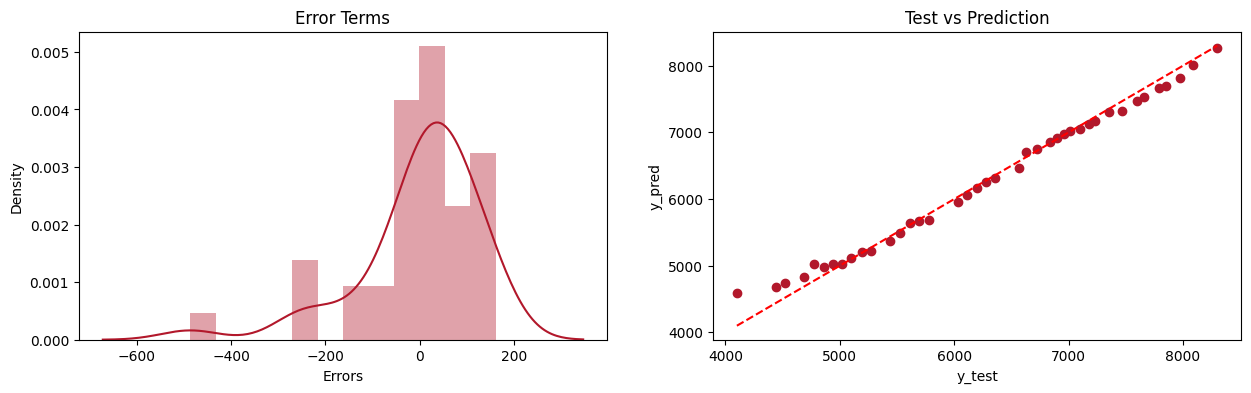

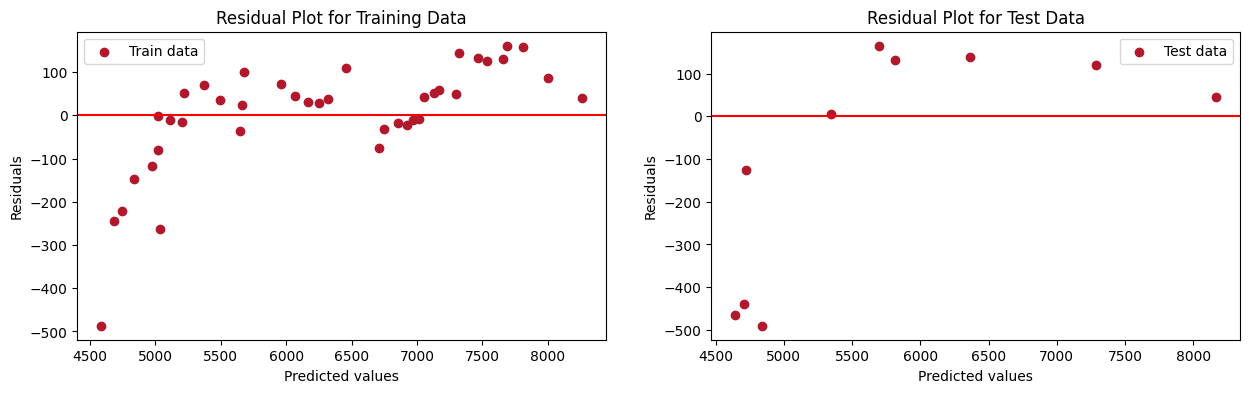

In [23]:
ENR = ElasticNet().fit(X_train_df, y_train)
pred1 = ENR.predict(X_train_df)
pred2 = ENR.predict(X_test)
r2_ENR = round(r2_score(y_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(ENR, X_train_df)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train_df.columns)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)
Evaluate(6, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)

2. With selected features

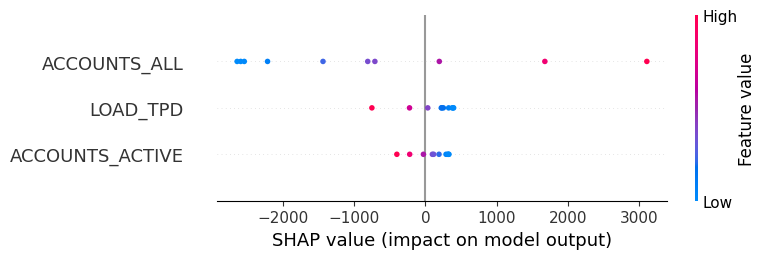

<<<------ Evaluating Elastic-Net Regression Model ------>>>

The Coeffecient of the Regresion Model was found to be  [-4.12382991e-05  2.50881308e-03 -3.15547010e-04]
The Intercept of the Regresion Model was found to be  3595.3647280293562


--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9932493714031227
Residual Sum of Squares (RSS) on Training set  ---> 358505.8860429323
Mean Squared Error (MSE) on Training set       ---> 8962.647151073306
Root Mean Squared Error (RMSE) on Training set ---> 94.67125831567522

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9950713150208528
Residual Sum of Squares (RSS) on Testing set  ---> 86017.18458267016
Mean Squared Error (MSE) on TTesting set       ---> 8601.718458267016
Root Mean Squared Error (RMSE) on Testing set ---> 92.74544979818157

--------------------Residual Plots--------------------


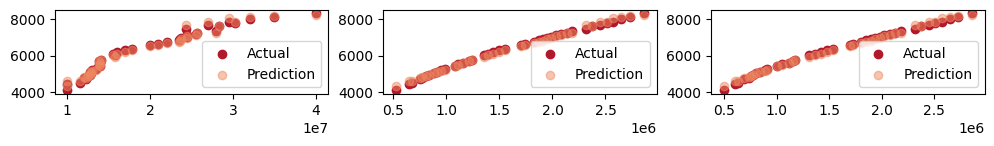

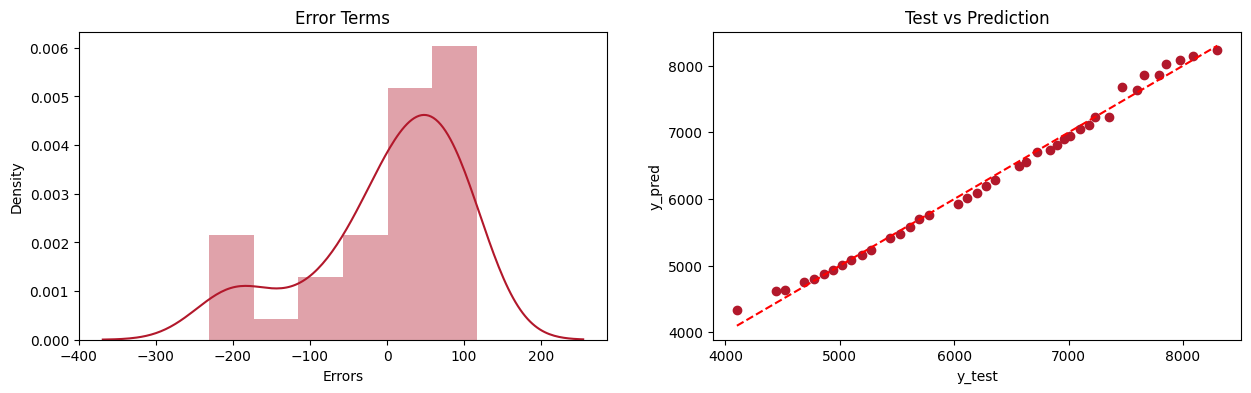

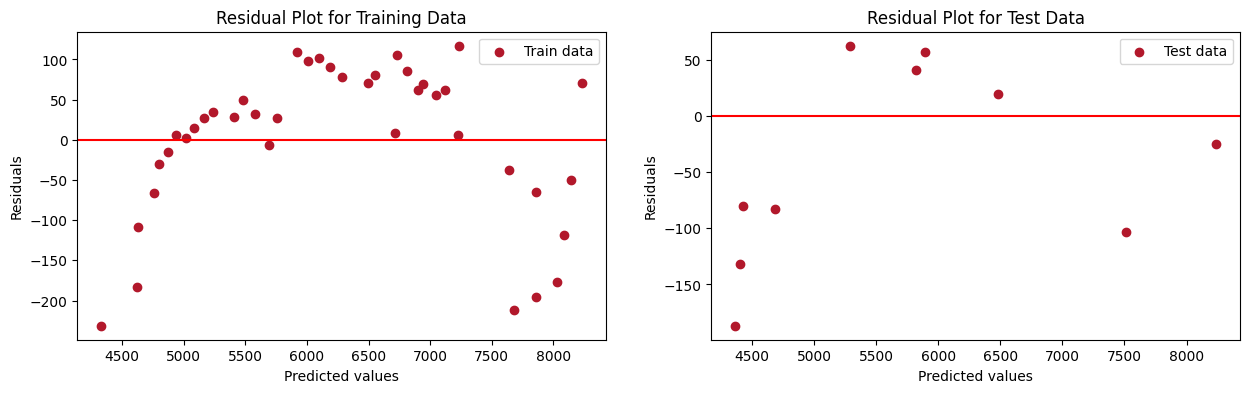

In [24]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

ENR1 = ElasticNet().fit(X1_train_df, y1_train)
pred1 = ENR1.predict(X1_train_df)
pred2 = ENR1.predict(X1_test)
r2_ENR1 = round(r2_score(y1_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(ENR1, X1_train_df)
shap_values = explainer(X1_test)
shap.summary_plot(shap_values, X1_test, feature_names=X1_train_df.columns)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR1.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR1.intercept_)
Evaluate(7, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)

Random Forest

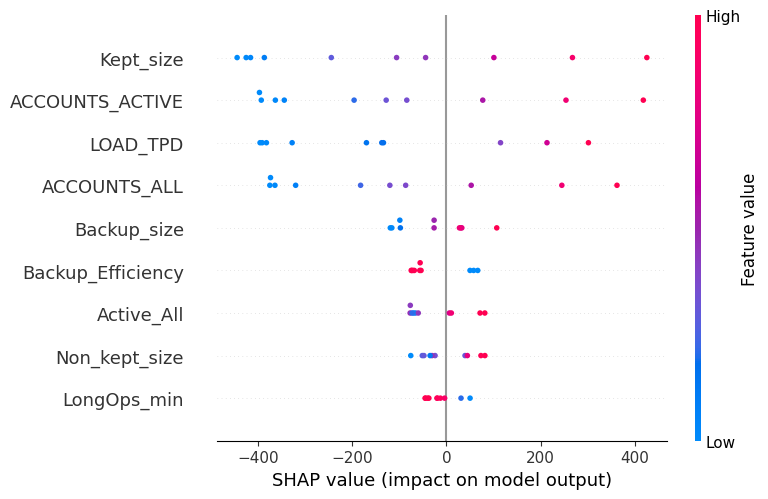

<<<------ Evaluating Random Forest Regression Model ------>>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9985377888947392
Residual Sum of Squares (RSS) on Training set  ---> 77653.6999999998
Mean Squared Error (MSE) on Training set       ---> 1941.3424999999947
Root Mean Squared Error (RMSE) on Training set ---> 44.06066840164814

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.995483071630427
Residual Sum of Squares (RSS) on Testing set  ---> 78831.06000000001
Mean Squared Error (MSE) on TTesting set       ---> 7883.106000000002
Root Mean Squared Error (RMSE) on Testing set ---> 88.78685713550178

--------------------Residual Plots--------------------


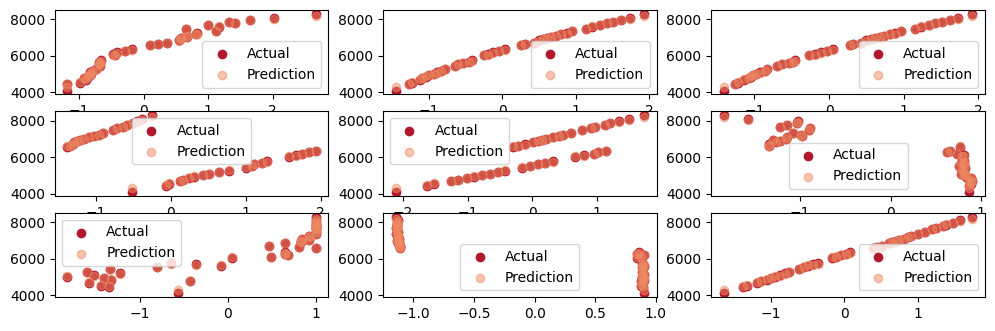

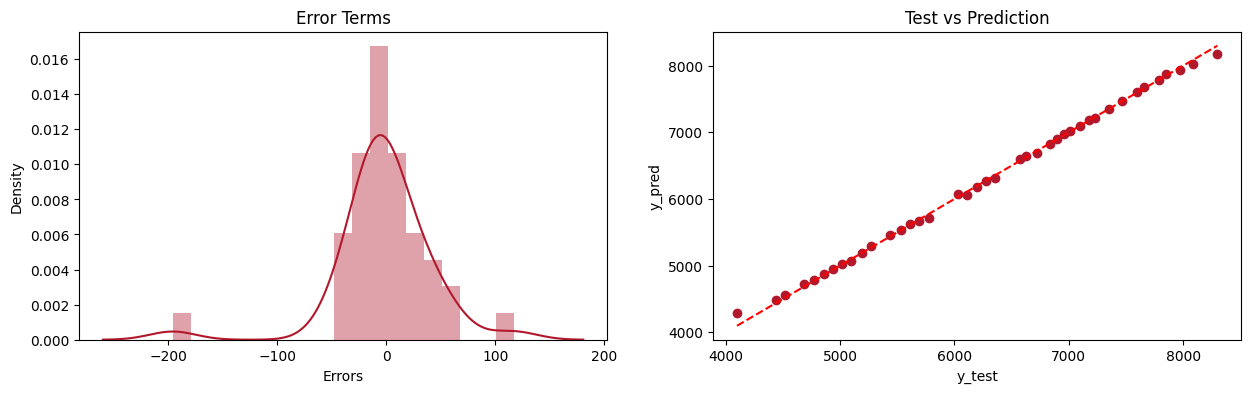

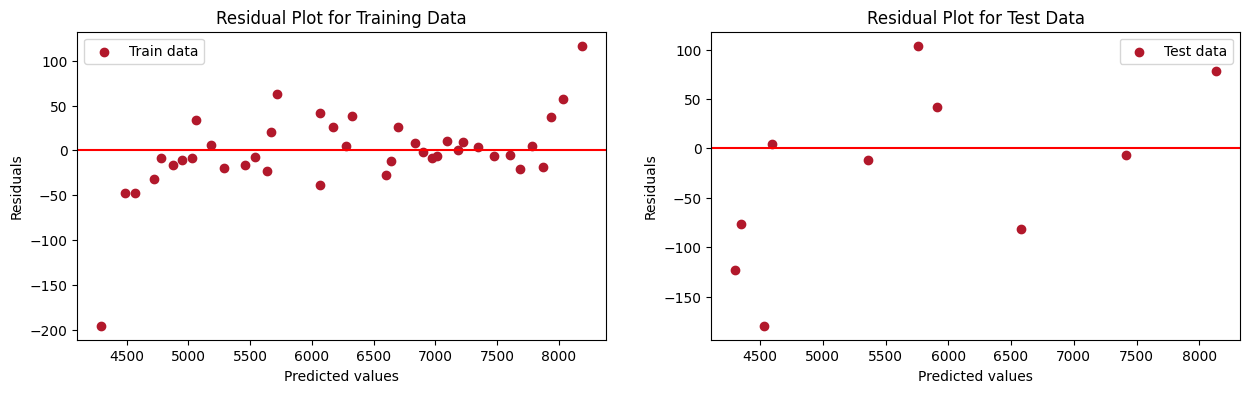

In [25]:
RFR = RandomForestRegressor().fit(X_train_df, y_train)
pred1 = RFR.predict(X_train_df)
pred2 = RFR.predict(X_test)
r2_RFR = round(r2_score(y_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(RFR, X_train_df)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train_df.columns)

print('{}{}\033[1m Evaluating Random Forest Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
Evaluate(8, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)

2. With selected features

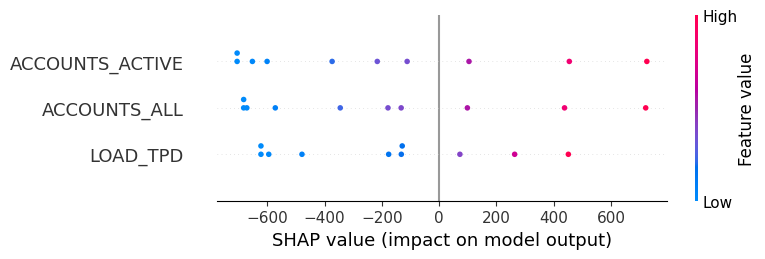

<<<------ Evaluating Random Forest Regression Model ------>>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9987751888815112
Residual Sum of Squares (RSS) on Training set  ---> 65046.08999999995
Mean Squared Error (MSE) on Training set       ---> 1626.1522499999987
Root Mean Squared Error (RMSE) on Training set ---> 40.32557811116908

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9984252433481775
Residual Sum of Squares (RSS) on Testing set  ---> 27483.219999999954
Mean Squared Error (MSE) on TTesting set       ---> 2748.3219999999956
Root Mean Squared Error (RMSE) on Testing set ---> 52.42444086492478

--------------------Residual Plots--------------------


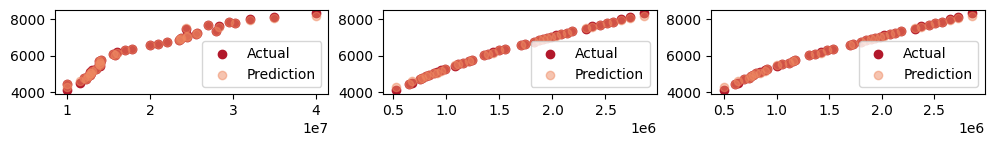

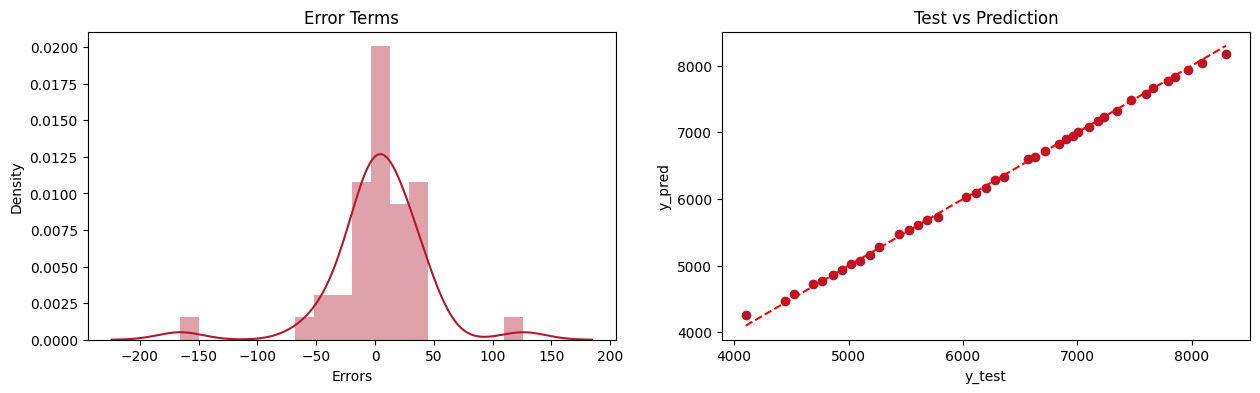

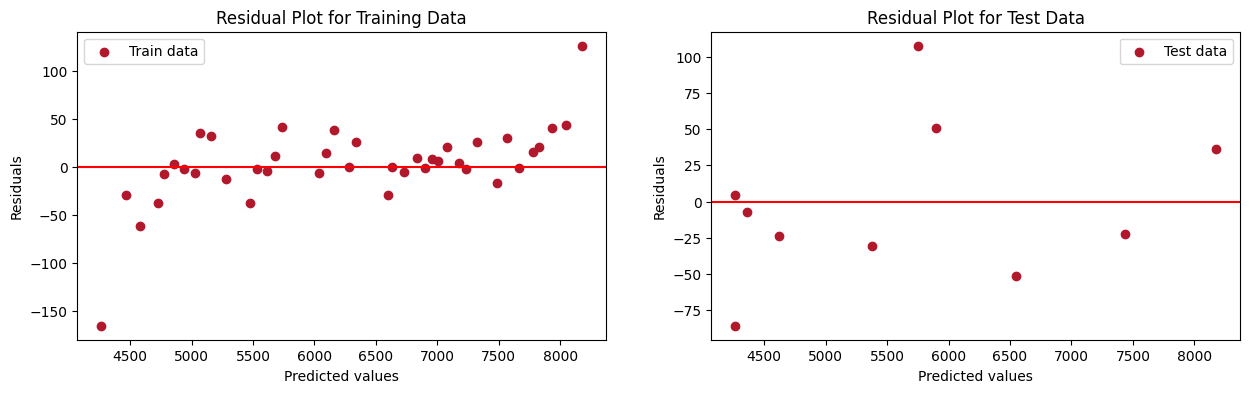

In [26]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

RFR1 = RandomForestRegressor().fit(X1_train_df, y1_train)
pred1 = RFR1.predict(X1_train_df)
pred2 = RFR1.predict(X1_test)
r2_RFR1 = round(r2_score(y1_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(RFR1, X1_train_df)
shap_values = explainer(X1_test)
shap.summary_plot(shap_values, X1_test, feature_names=X1_train_df.columns)

print('{}{}\033[1m Evaluating Random Forest Regression Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
Evaluate(9, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)

KNeighborsRegressor

1. With all features

<<<------ Evaluating K-Nearest Neighbors (KNN) Model ------>>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9893464966860561
Residual Sum of Squares (RSS) on Training set  ---> 565776.0
Mean Squared Error (MSE) on Training set       ---> 14144.400000000001
Root Mean Squared Error (RMSE) on Training set ---> 118.93023164864348

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9759406750720245
Residual Sum of Squares (RSS) on Testing set  ---> 419892.0
Mean Squared Error (MSE) on TTesting set       ---> 41989.2
Root Mean Squared Error (RMSE) on Testing set ---> 204.91266432312085

--------------------Residual Plots--------------------


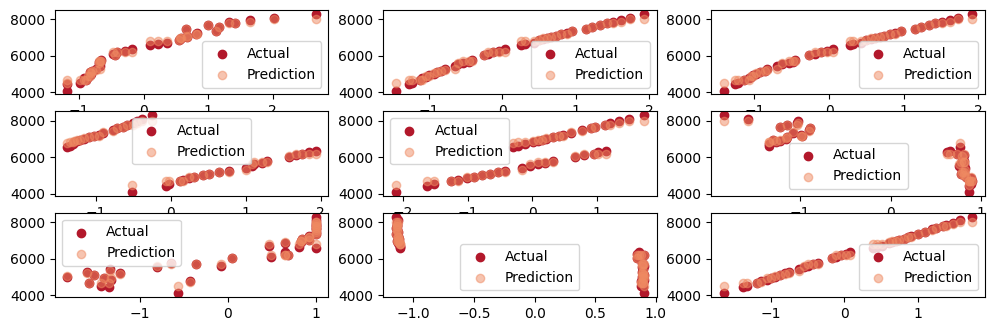

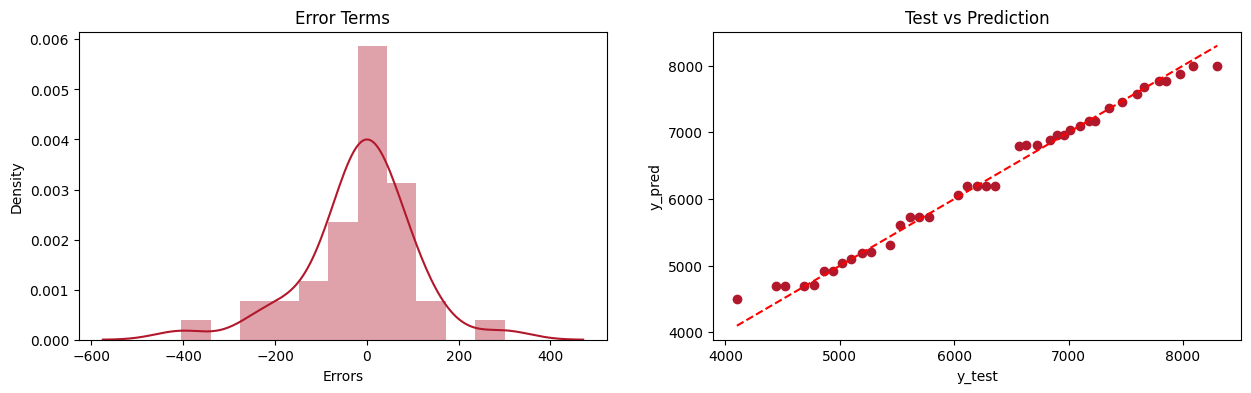

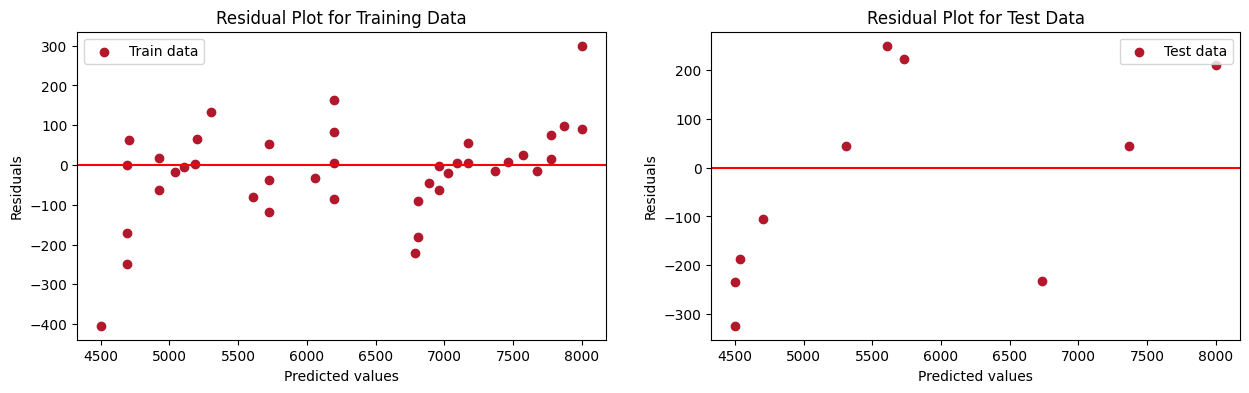

In [27]:
KNN = KNeighborsRegressor().fit(X_train_df, y_train)
pred1 = KNN.predict(X_train_df)
pred2 = KNN.predict(X_test)
r2_KNN = round(r2_score(y_test, pred2),20)

print('{}{}\033[1m Evaluating K-Nearest Neighbors (KNN) Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
Evaluate(10, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)

2. With selected features

<<<------ Evaluating K-Nearest Neighbors (KNN) Model ------>>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9831969538877027
Residual Sum of Squares (RSS) on Training set  ---> 892360.0000000001
Mean Squared Error (MSE) on Training set       ---> 22309.0
Root Mean Squared Error (RMSE) on Training set ---> 149.3619764197033

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9713485167622029
Residual Sum of Squares (RSS) on Testing set  ---> 500036.0
Mean Squared Error (MSE) on TTesting set       ---> 50003.6
Root Mean Squared Error (RMSE) on Testing set ---> 223.61484744980598

--------------------Residual Plots--------------------


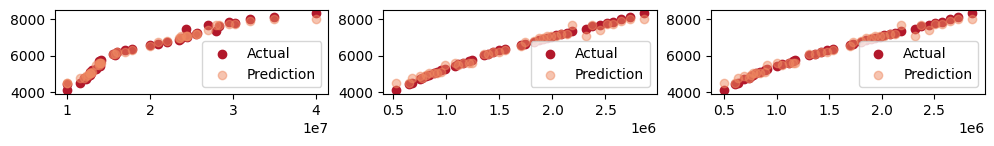

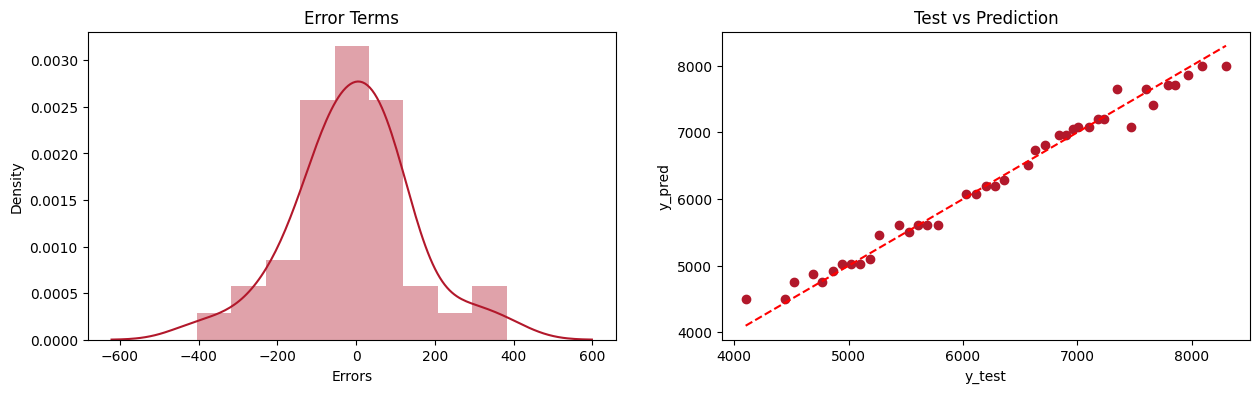

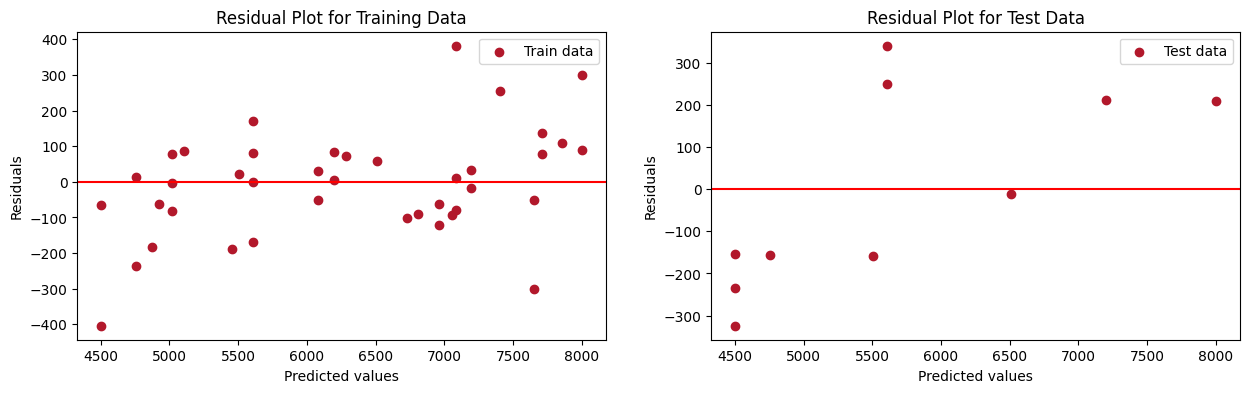

In [28]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

KNN1 = KNeighborsRegressor().fit(X1_train_df, y1_train)
pred1 = KNN1.predict(X1_train_df)
pred2 = KNN1.predict(X1_test)
r2_KNN1 = round(r2_score(y1_test, pred2),20)

print('{}{}\033[1m Evaluating K-Nearest Neighbors (KNN) Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
Evaluate(11, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)

 Gradient Boosting Regressor

1. With all features

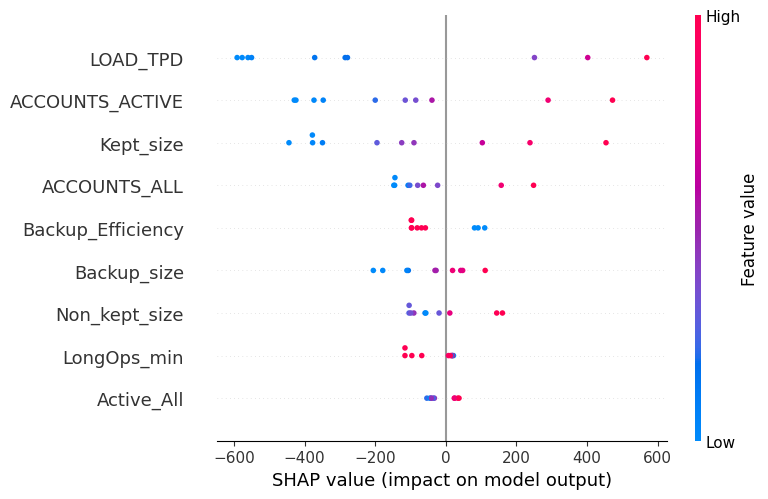

<<<------ Evaluating Gradient Boosting Regressor Model ------>>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999999941507559
Residual Sum of Squares (RSS) on Training set  ---> 0.31063602388254424
Mean Squared Error (MSE) on Training set       ---> 0.007765900597063606
Root Mean Squared Error (RMSE) on Training set ---> 0.08812434735680943

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9970585544835024
Residual Sum of Squares (RSS) on Testing set  ---> 51335.16607430193
Mean Squared Error (MSE) on TTesting set       ---> 5133.516607430193
Root Mean Squared Error (RMSE) on Testing set ---> 71.64856319166626

--------------------Residual Plots--------------------


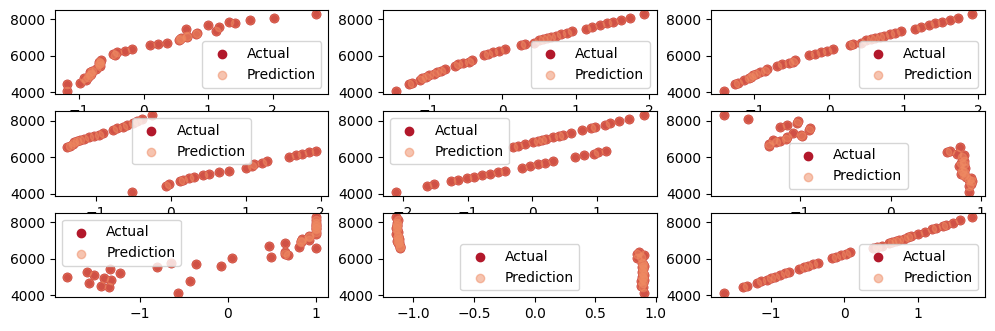

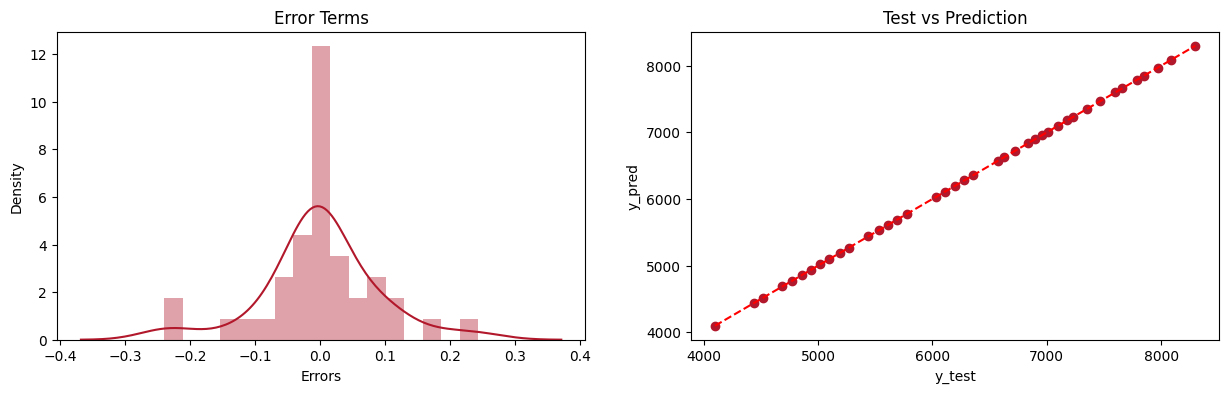

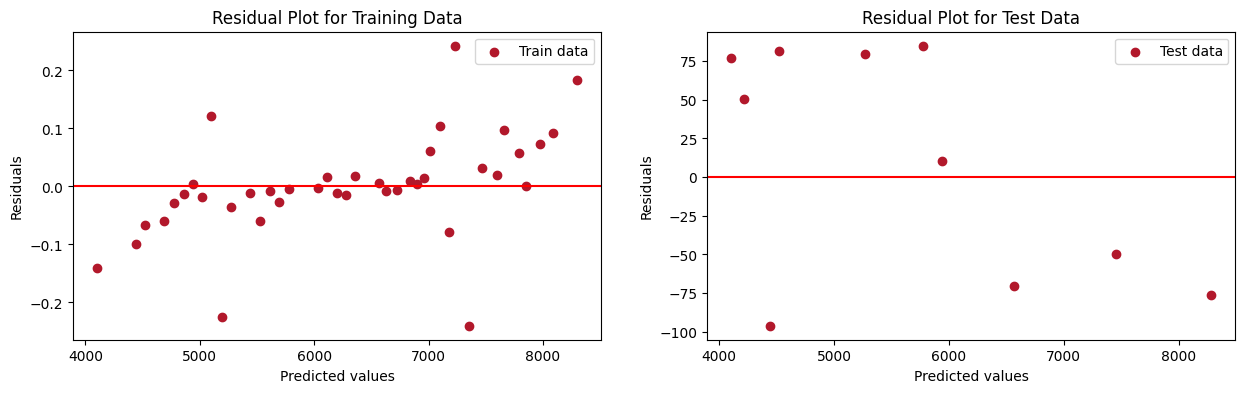

In [29]:
GBR = GradientBoostingRegressor().fit(X_train_df, y_train)
pred1 = GBR.predict(X_train_df)
pred2 = GBR.predict(X_test)
r2_GBR = round(r2_score(y_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(GBR, X_train_df)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train_df.columns)

print('{}{}\033[1m Evaluating Gradient Boosting Regressor Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
Evaluate(12, y_train, y_test, pred1, pred2)
Plots(X_train_df, y_train, y_test, pred1, pred2)

2. With selected Features

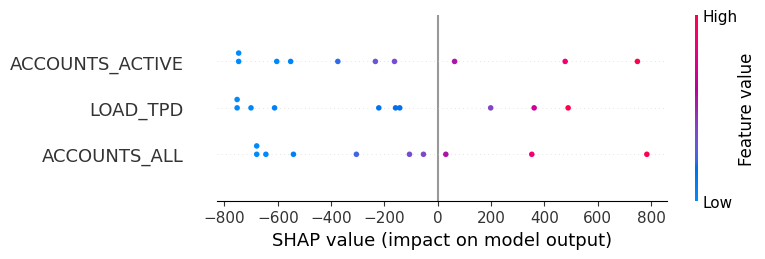

<<<------ Evaluating Gradient Boosting Regressor Model ------>>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9999999932695527
Residual Sum of Squares (RSS) on Training set  ---> 0.35743411331420877
Mean Squared Error (MSE) on Training set       ---> 0.00893585283285522
Root Mean Squared Error (RMSE) on Training set ---> 0.09452963996998626

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9965055738971851
Residual Sum of Squares (RSS) on Testing set  ---> 60985.98233972386
Mean Squared Error (MSE) on TTesting set       ---> 6098.598233972387
Root Mean Squared Error (RMSE) on Testing set ---> 78.09352235603403

--------------------Residual Plots--------------------


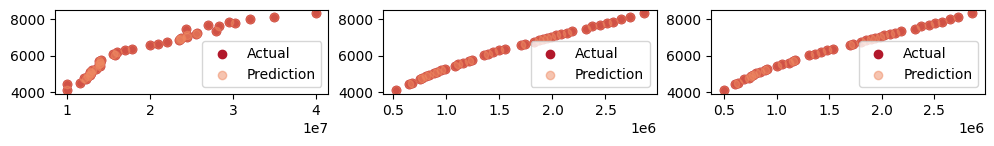

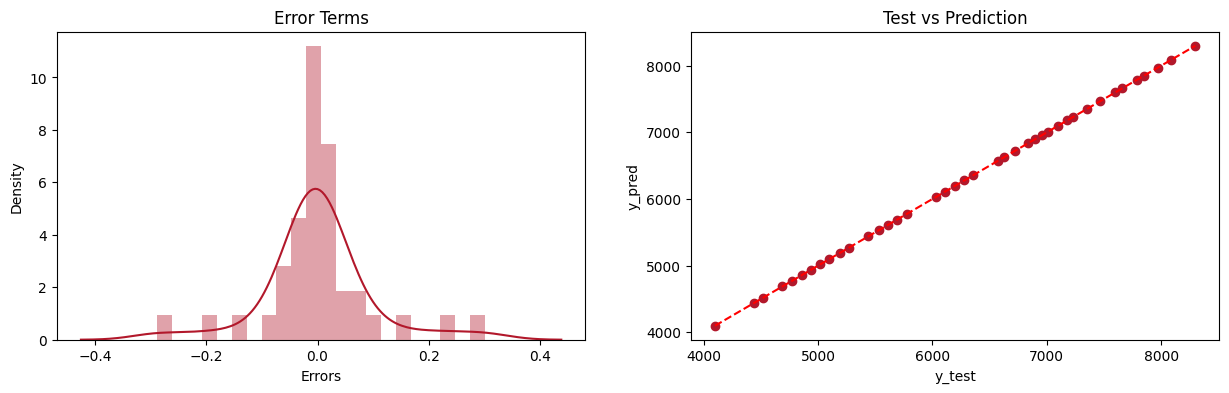

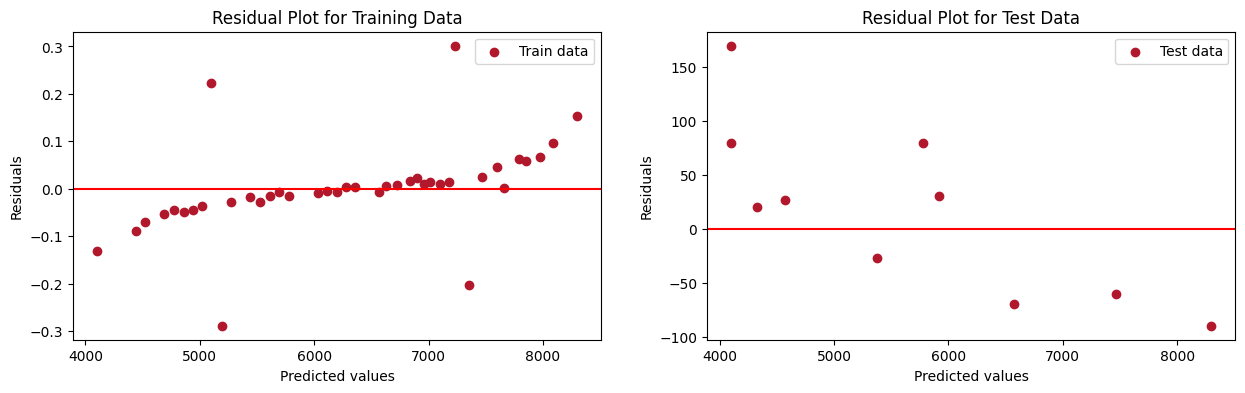

In [30]:
y1 = data['SIZE']
X1 = data.drop('SIZE', axis=1)
X1 = X1.drop('Active_All', axis=1)
X1 = X1.drop('Backup_Efficiency', axis=1)
X1 = X1.drop('Non_kept_size', axis=1)
X1 = X1.drop('Kept_size', axis=1)
X1 = X1.drop('LongOps_min', axis=1)
X1 = X1.drop('Backup_size', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=55)
X1_train_df = pd.DataFrame(X1_train, columns=X1_train.columns)

GBR1 = GradientBoostingRegressor().fit(X1_train_df, y1_train)
pred1 = GBR1.predict(X1_train_df)
pred2 = GBR1.predict(X1_test)
r2_GBR1 = round(r2_score(y1_test, pred2),20)

# Calculate Shapley values
explainer = shap.Explainer(GBR1, X1_train_df)
shap_values = explainer(X1_test)
shap.summary_plot(shap_values, X1_test, feature_names=X1_train_df.columns)

print('{}{}\033[1m Evaluating Gradient Boosting Regressor Model \033[0m{}{}\n'.format('<'*3,'-'*6 ,'-'*6,'>'*3))
Evaluate(13, y1_train, y1_test, pred1, pred2)
Plots(X1_train_df, y1_train, y1_test, pred1, pred2)

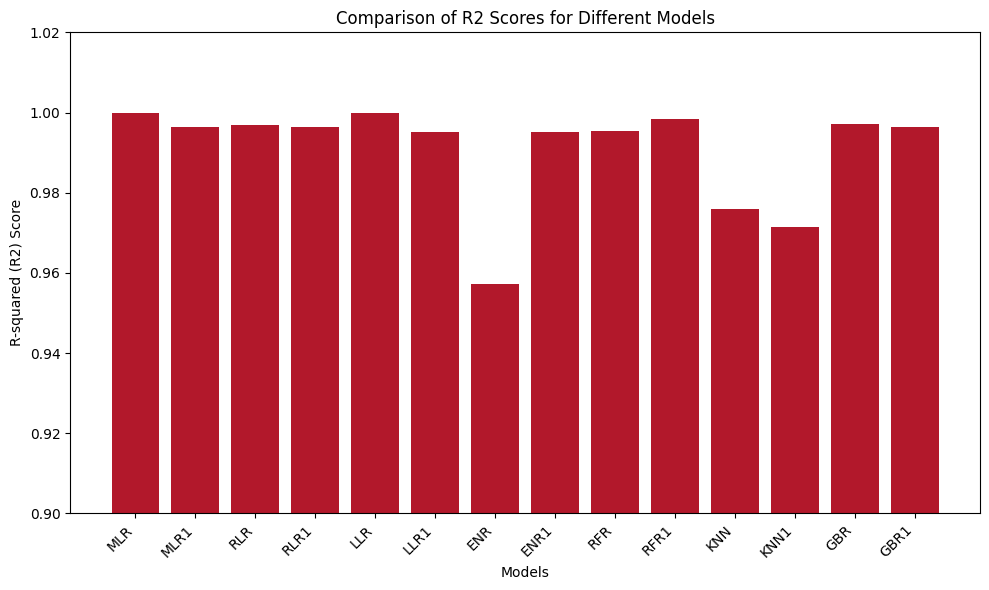

In [48]:
model_names = ['MLR', 'MLR1', 'RLR', 'RLR1', 'LLR', 'LLR1', 'ENR', 'ENR1', 'RFR', 'RFR1','KNN', 'KNN1', 'GBR', 'GBR1']
r2_scores = [r2_MLR, r2_MLR1, r2_RLR, r2_RLR1, r2_LLR, r2_LLR1, r2_ENR, r2_ENR1, r2_RFR, r2_RFR1, r2_KNN, r2_KNN1, r2_GBR, r2_GBR1]
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores)
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0.9, 1.02)
plt.tight_layout()
plt.show()


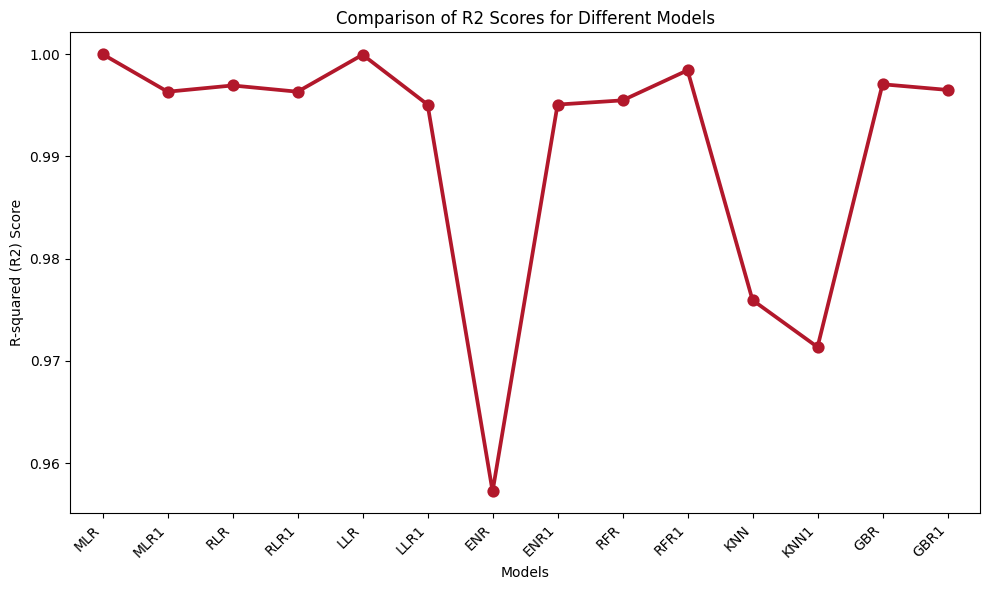

In [32]:
df = pd.DataFrame({'Model': model_names, 'R2 Score': r2_scores})
plt.figure(figsize=(10, 6))
sns.pointplot(x='Model', y='R2 Score', data=df)
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [33]:
df_sorted = df.sort_values(by='R2 Score', ascending=False)
print(df_sorted.to_string(index=False, float_format='{:4f}'.format))

Model  R2 Score
  MLR  1.000000
  LLR  0.999948
 RFR1  0.998425
  GBR  0.997059
  RLR  0.996941
 GBR1  0.996506
 MLR1  0.996329
 RLR1  0.996329
  RFR  0.995483
 ENR1  0.995071
 LLR1  0.995071
  KNN  0.975941
 KNN1  0.971349
  ENR  0.957219


PREDICTION

In [34]:
new_data = pd.read_csv('History3.csv')
date = pd.read_csv('History2.csv')

In [35]:
def Prediction(model, data):
    date = pd.read_csv('History2.csv')
    pred_next_10 = model.predict(data)
    print("Predictions for the next 10 rows:")
    print(pred_next_10) 
    plt.figure(figsize=(10, 6))
    new_data = pd.read_csv('History3.csv')
    plt.plot(date['DATE'], date['SIZE'], color='blue', label='Original SIZE', marker='o')
    plt.plot(new_data['DATE'], pred_next_10, color='red', label='Predicted New Values', marker='x')

    plt.title('Comparison of Original SIZE and Predicted New Values')
    plt.xlabel('Date')
    plt.ylabel('SIZE Values')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

In [36]:
new_data1 = new_data.drop('DATE', axis=1)
new_data1 = new_data1.drop('Non_kept_size', axis=1)
new_data1 = new_data1.drop('Kept_size', axis=1)
new_data1 = new_data1.drop('Backup_size', axis=1)
new_data1 = new_data1.drop('LongOps_min', axis=1)

Predictions for the next 10 rows:
[8350.2603858  8401.23038065 8451.40236128 8527.34998051 8574.76818119
 8625.33901116 8679.06561031 8751.72461576 8795.98485399 8837.08932304]


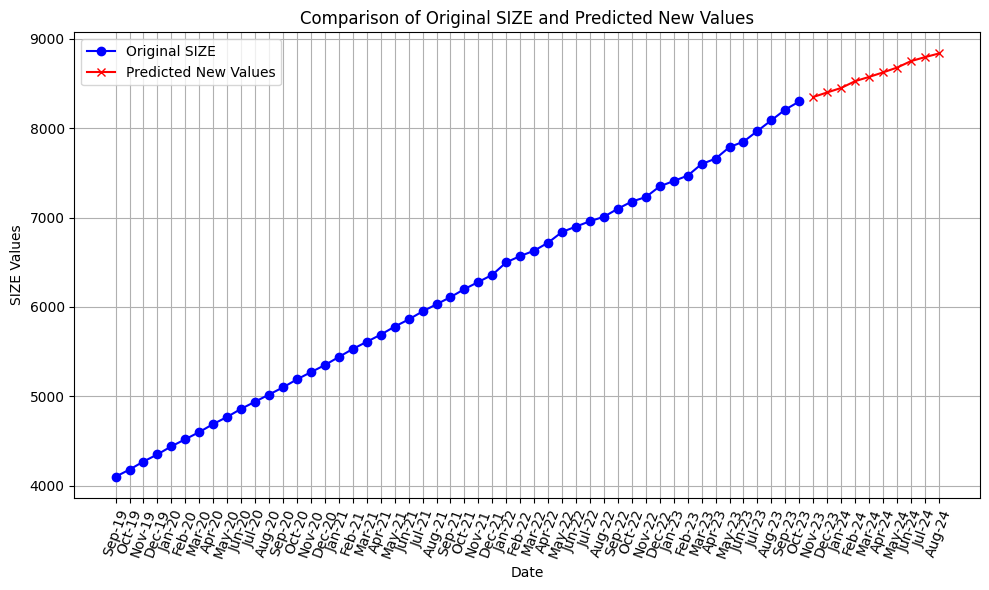

In [37]:
Prediction(LLR1, new_data1)

Predictions for the next 10 rows:
[8431.48499721 8471.75379632 8509.79211793 8619.87424514 8650.21175038
 8689.36486976 8737.33847367 8838.22881108 8859.74360727 8872.43791892]


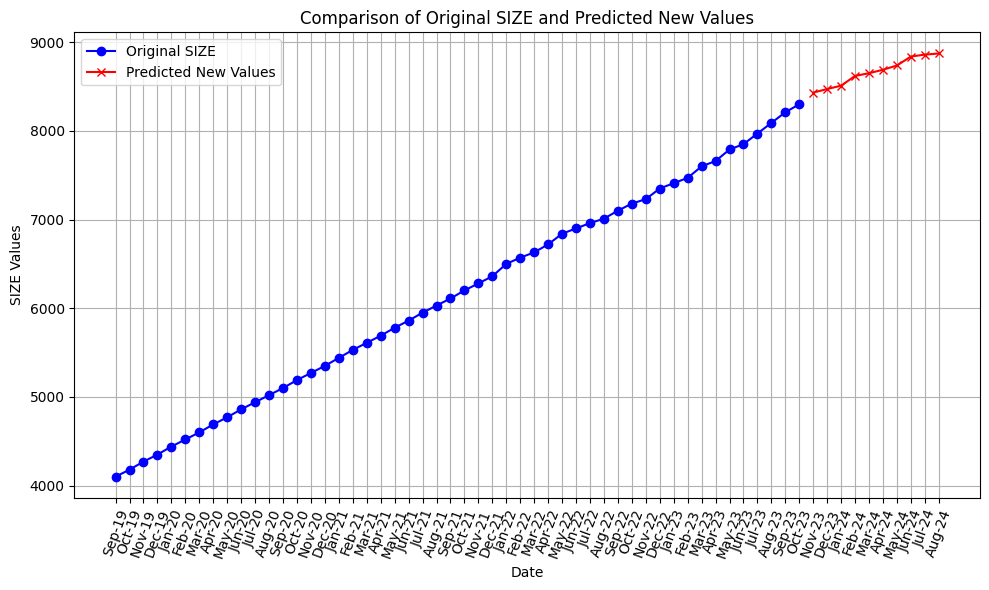

In [38]:
Prediction(RLR1, new_data1)

Predictions for the next 10 rows:
[8431.48499728 8471.75379637 8509.79211798 8619.87424522 8650.21175045
 8689.36486981 8737.33847372 8838.22881115 8859.74360732 8872.43791895]


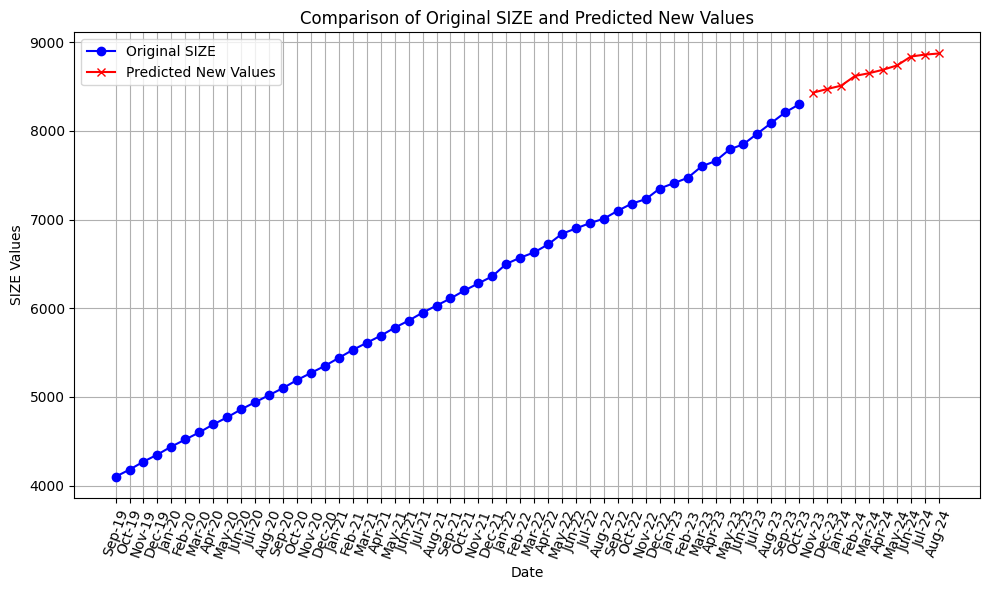

In [39]:
Prediction(MLR1, new_data1)

Predictions for the next 10 rows:
[8350.26063461 8401.23060136 8451.40254973 8527.35027115 8574.7684252
 8625.33922499 8679.06581042 8751.72490091 8795.98507604 8837.08946552]


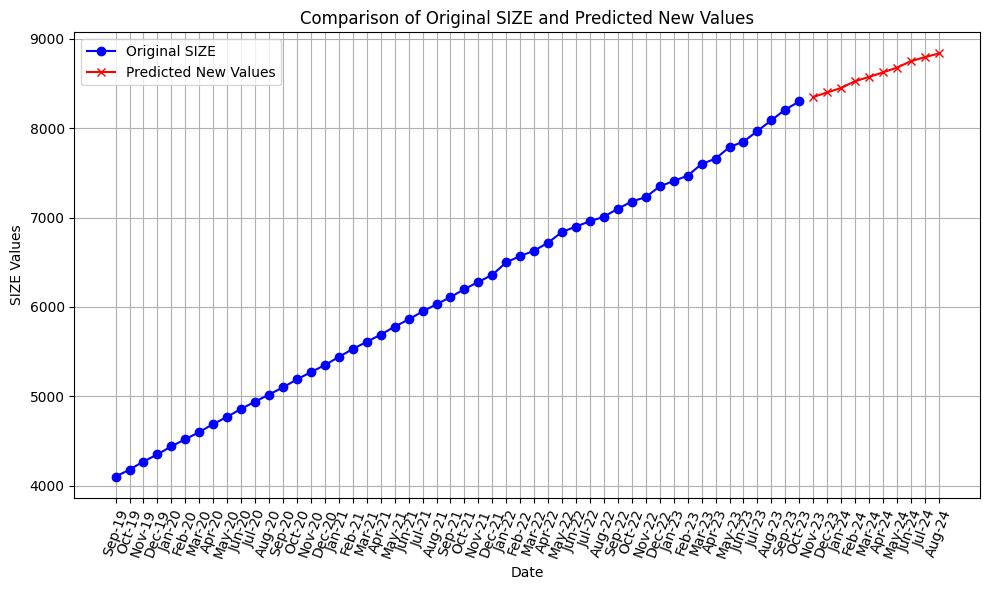

In [40]:
Prediction(ENR1, new_data1)

Predictions for the next 10 rows:
[8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.]


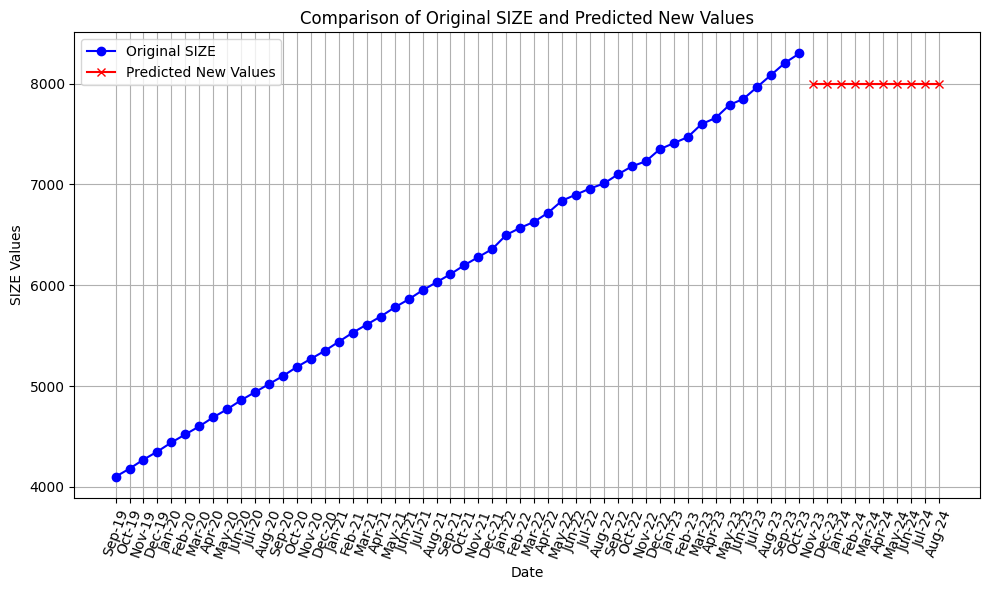

In [41]:
Prediction(KNN1, new_data1)

Predictions for the next 10 rows:
[8174. 8174. 8174. 8174. 8174. 8174. 8174. 8174. 8174. 8174.]


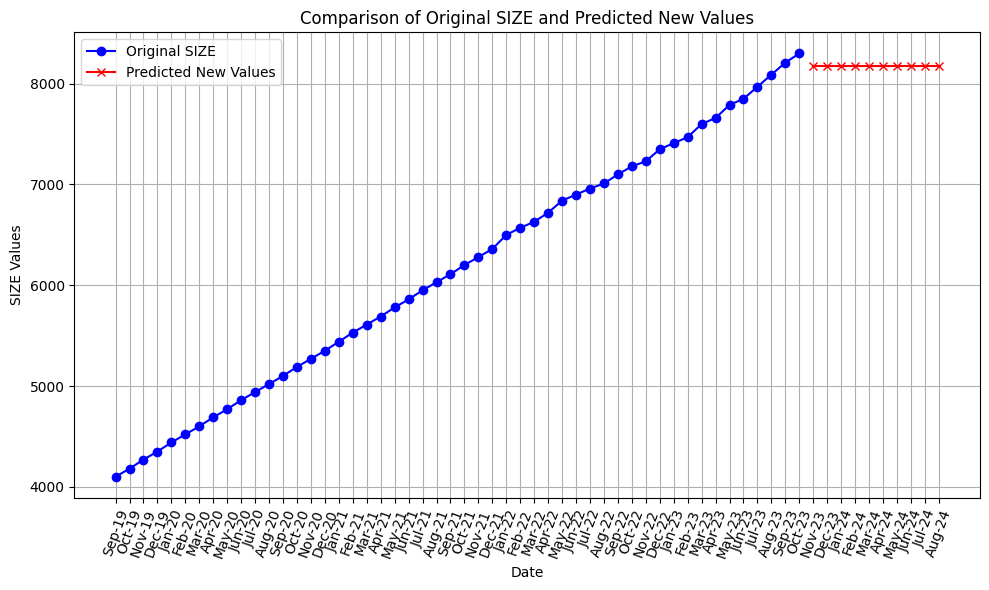

In [51]:
Prediction(RFR1, new_data1)

Predictions for the next 10 rows:
[8299.84744177 8299.84744177 8299.84744177 8299.84744177 8299.84744177
 8299.84744177 8299.84744177 8299.84744177 8299.84744177 8299.84744177]


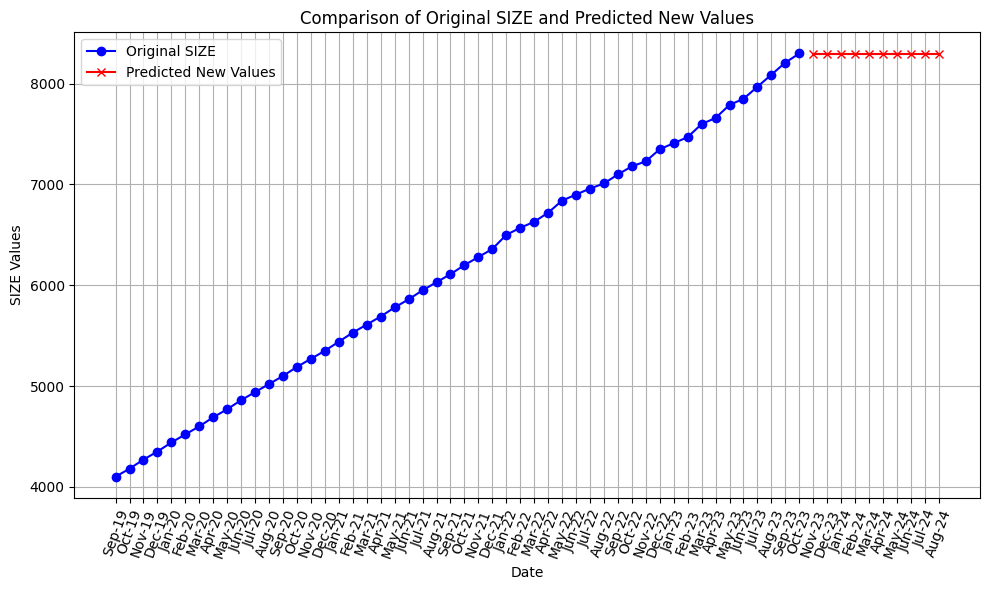

In [42]:
Prediction(GBR1, new_data1)

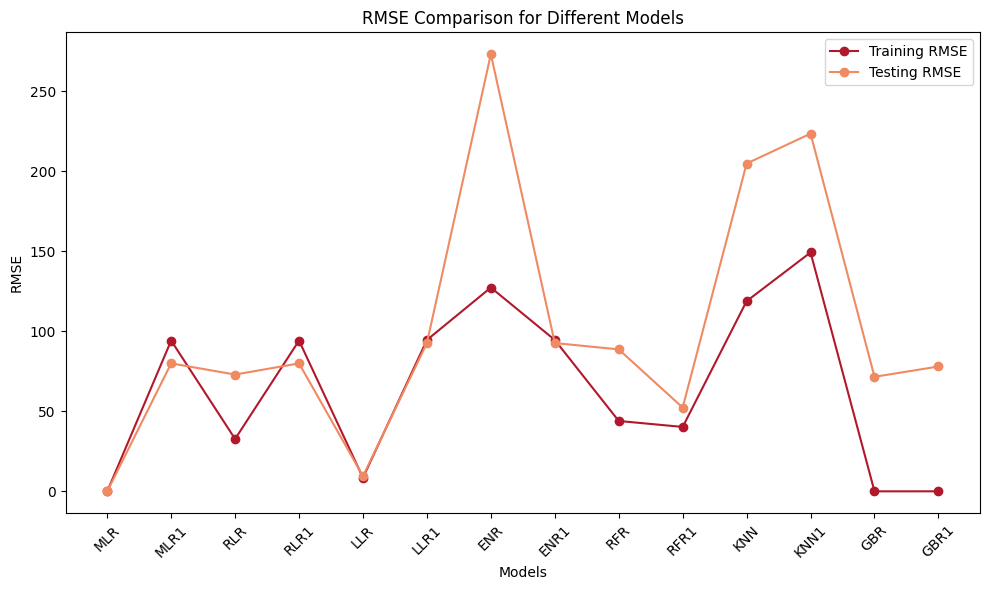

In [43]:
model_names = ['MLR', 'MLR1', 'RLR', 'RLR1', 'LLR', 'LLR1', 'ENR', 'ENR1', 'RFR', 'RFR1', 'KNN', 'KNN1', 'GBR', 'GBR1']

train_rmse_values = Model_Evaluation_Comparison_Matrix['Train-RMSE']
test_rmse_values = Model_Evaluation_Comparison_Matrix['Test-RMSE']

plt.figure(figsize=(10, 6))
plt.plot(model_names, train_rmse_values, label='Training RMSE', marker='o')
plt.plot(model_names, test_rmse_values, label='Testing RMSE', marker='o')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Models')
plt.xticks(rotation=45) 
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
test_rmse_values

0     1.253652e-12
1     8.004274e+01
2     7.307187e+01
3     8.004274e+01
4     9.560636e+00
5     9.274549e+01
6     2.732466e+02
7     9.274545e+01
8     8.878686e+01
9     5.242444e+01
10    2.049127e+02
11    2.236148e+02
12    7.164856e+01
13    7.809352e+01
Name: Test-RMSE, dtype: float64

In [45]:
range(len(train_rmse_values))

range(0, 14)

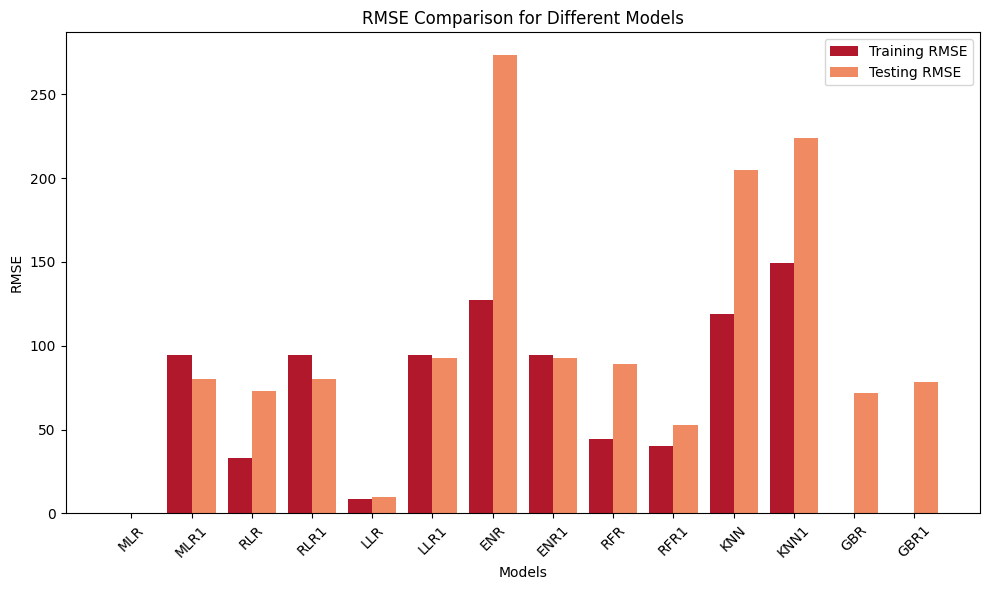

In [49]:
import matplotlib.pyplot as plt

model_names = ['MLR', 'MLR1', 'RLR', 'RLR1', 'LLR', 'LLR1', 'ENR', 'ENR1', 'RFR', 'RFR1', 'KNN', 'KNN1', 'GBR', 'GBR1']
train_rmse_values = Model_Evaluation_Comparison_Matrix['Train-RMSE']
test_rmse_values = Model_Evaluation_Comparison_Matrix['Test-RMSE']

x = range(len(model_names))  # Create x-axis values

plt.figure(figsize=(10, 6))

# Plotting Training RMSE values as bars
plt.bar(x, train_rmse_values, width=0.4, label='Training RMSE', align='center')

# Plotting Testing RMSE values as bars slightly shifted to the right for comparison
plt.bar([i + 0.4 for i in x], test_rmse_values, width=0.4, label='Testing RMSE', align='center')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different Models')
plt.xticks([i + 0.2 for i in x], model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()